In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
import matplotlib.patches as mpatches
import seaborn as sns
from scipy import sparse
import anndata
import warnings
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
import tempfile
import os
from scipy import stats
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/rpy2/rinterface/__init__.py:1211: UserWarning: Environment variable "PWD" redefined by R and overriding existing variable. Current: "/", R: "/Users/siyuanzhao/Documents/GitHub/Biovis2025/Python"
  warnings.warn(
/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/rpy2/rinterface/__init__.py:1211: UserWarning: Environment variable "R_SESSION_TMPDIR" redefined by R and overriding existing variable. Current: "/var/folders/pm/_db3z8953vb1gtk99jkk_sb80000gn/T//RtmppVg9mH", R: "/var/folders/pm/_db3z8953vb1gtk99jkk_sb80000gn/T//RtmpPaJjDz"
  warnings.warn(


### **Cluster preprocessing**

In [2]:
cell_ids_1 = [
  "40211",
  "40215",
  "40223",
  "40227",
  "40229",
  "40234",
  "40236",
  "40244",
  "40245",
  "40249",
  "40250",
  "40255",
  "40258",
  "40267",
  "40269",
  "40273",
  "40282",
  "40286",
  "40290",
  "40293",
  "40298",
  "40301",
  "40304",
  "40309",
  "40311",
  "40315",
  "40329",
  "40337",
  "40345",
  "40347",
  "40348",
  "40349",
  "40351",
  "40355",
  "40362",
  "40366",
  "40369",
  "40373",
  "40374",
  "40376",
  "40381",
  "40387",
  "40390",
  "40391",
  "40394",
  "40395",
  "40404",
  "40420",
  "40424",
  "40426",
  "40430",
  "40432",
  "40437",
  "40444",
  "40447",
  "40448",
  "40449",
  "40459",
  "40464",
  "40472",
  "40476",
  "40479",
  "40504",
  "40506",
  "40507",
  "40510",
  "40513",
  "40514",
  "40524",
  "40527",
  "40529",
  "40530",
  "40539",
  "40540",
  "40546",
  "40550",
  "40552",
  "40555",
  "40559",
  "40560",
  "40568",
  "40573",
  "40581",
  "40591",
  "40592",
  "40605",
  "40609",
  "40612",
  "40613",
  "40624",
  "40633",
  "40639",
  "40642",
  "40643",
  "40644",
  "40645",
  "40649",
  "40663",
  "40667",
  "40669",
  "40680",
  "40689",
  "40690",
  "40691",
  "40693",
  "40696",
  "40697",
  "40706",
  "40711",
  "40713",
  "40715",
  "40718",
  "40722",
  "40723",
  "40727",
  "40732",
  "40733",
  "40736",
  "40739",
  "40742",
  "40749",
  "40750",
  "40751",
  "40758",
  "40763",
  "40767",
  "40769",
  "40778",
  "40779",
  "40781",
  "40787",
  "40788",
  "40794",
  "40797",
  "40798",
  "40803",
  "40806",
  "40807",
  "40808",
  "40812",
  "40814",
  "40815",
  "40818",
  "40839",
  "40841",
  "40852",
  "40864",
  "40872",
  "40875",
  "40877",
  "40878",
  "40879",
  "40881",
  "40888",
  "40897",
  "40902",
  "40903",
  "40904",
  "40912",
  "40913",
  "40918",
  "40921",
  "40923",
  "40924",
  "40930",
  "40931",
  "40944",
  "40947",
  "40951",
  "40961",
  "40968",
  "40970",
  "40972",
  "40975",
  "40979",
  "40981",
  "40987",
  "40993",
  "41003",
  "41005",
  "41014",
  "41024",
  "41026",
  "41031",
  "41033",
  "41038",
  "41041",
  "41044",
  "41051",
  "41053",
  "41062",
  "41066",
  "41072",
  "41073",
  "41075",
  "41076",
  "41079",
  "41095",
  "41096",
  "41097",
  "41103",
  "41106",
  "41107",
  "41109",
  "41113",
  "41122",
  "41127",
  "41136",
  "41137",
  "41146",
  "41161",
  "41163",
  "41165",
  "41171",
  "41173",
  "41175",
  "41180",
  "41193",
  "41194",
  "41206",
  "41207",
  "41212",
  "41216",
  "41220",
  "41223",
  "41224",
  "41231",
  "41238",
  "41244",
  "41246",
  "41247",
  "41253",
  "41261",
  "41263",
  "41268",
  "41270",
  "41273",
  "41276",
  "41277",
  "41278",
  "41279",
  "41286",
  "41288",
  "41301",
  "41314",
  "41324",
  "41325",
  "41330",
  "41334",
  "41342",
  "41347",
  "41350",
  "41354",
  "41362",
  "41366",
  "41372",
  "41385",
  "41386",
  "41394",
  "41397",
  "41402",
  "41405",
  "41407",
  "41409",
  "41411",
  "41414",
  "41421",
  "41423",
  "41424",
  "41427",
  "41430",
  "41434",
  "41442",
  "41445",
  "41455",
  "41458",
  "41459",
  "41468",
  "41474",
  "41477",
  "41480",
  "41483",
  "41499",
  "41502",
  "41503",
  "41509",
  "41525",
  "41528",
  "41530",
  "41534",
  "41540",
  "41548",
  "41549",
  "41550",
  "41555",
  "41558",
  "41566",
  "41568",
  "41569",
  "41578",
  "41581",
  "41582",
  "41583",
  "41588",
  "41597",
  "41598",
  "41599",
  "41600",
  "41605",
  "41606",
  "41613",
  "41625",
  "41629",
  "41630",
  "41632",
  "41645",
  "41647",
  "41657",
  "41662",
  "41663",
  "41665",
  "41667",
  "41670",
  "41679",
  "41700",
  "41706",
  "41708",
  "41711",
  "41713",
  "41721",
  "41723",
  "41725",
  "41740",
  "41741",
  "41743",
  "41744",
  "41747",
  "41753",
  "41754",
  "41755",
  "41757",
  "41760",
  "41768",
  "41769",
  "41770",
  "41782",
  "41786",
  "41791",
  "41797",
  "41812",
  "41822",
  "41823",
  "41825",
  "41828",
  "41832",
  "41833",
  "41834",
  "41844",
  "41855",
  "41863",
  "41868",
  "41870",
  "41885",
  "41888",
  "41891",
  "41895",
  "41896",
  "41899",
  "41902",
  "41904",
  "41912",
  "41913",
  "41920",
  "41924",
  "41927",
  "41931",
  "41937",
  "41945",
  "41947",
  "41951",
  "41954",
  "41961",
  "41975",
  "41977",
  "41979",
  "41989",
  "41990",
  "41992",
  "41993",
  "41994",
  "42001",
  "42004",
  "42006",
  "42008",
  "42011",
  "42023",
  "42026",
  "42027",
  "42044",
  "42047",
  "42050",
  "42052",
  "42059",
  "42060",
  "42061",
  "42068",
  "42071",
  "42078",
  "42085",
  "42086",
  "42088",
  "42094",
  "42097",
  "42103",
  "42114",
  "42125",
  "42127",
  "42128",
  "42133",
  "42135",
  "42138",
  "42145",
  "42165",
  "42179",
  "42183",
  "42195",
  "42202",
  "42203",
  "42206",
  "42214",
  "42215",
  "42218",
  "42225",
  "42226",
  "42241",
  "42246",
  "42251",
  "42253",
  "42255",
  "42264",
  "42278",
  "42279",
  "42280",
  "42282",
  "42288",
  "42292",
  "42296",
  "42297",
  "42302",
  "42313",
  "42328",
  "42330",
  "42335",
  "42338",
  "42342",
  "42359",
  "42372",
  "42373",
  "42376",
  "42382",
  "42389",
  "42393",
  "42409",
  "42412",
  "42418",
  "42439",
  "42440",
  "42445",
  "42449",
  "42453",
  "42476",
  "42488",
  "42489",
  "42491",
  "42498",
  "42503",
  "42504",
  "42505",
  "42508",
  "42516",
  "42523",
  "42525",
  "42526",
  "42527",
  "42531",
  "42540",
  "42541",
  "42544",
  "42546",
  "42554",
  "42561",
  "42572",
  "42582",
  "42584",
  "42587",
  "42599",
  "42605",
  "42608",
  "42616",
  "42623",
  "42625",
  "42630",
  "42633",
  "42638",
  "42642",
  "42643",
  "42648",
  "42650",
  "42655",
  "42666",
  "42676",
  "42679",
  "42698",
  "42701",
  "42705",
  "42711",
  "42720",
  "42723",
  "42724",
  "42741",
  "42754",
  "42769",
  "42781",
  "42782",
  "42783",
  "42791",
  "42795",
  "42798",
  "42806",
  "42817",
  "42820",
  "42822",
  "42823",
  "42826",
  "42827",
  "42834",
  "42837",
  "42839",
  "42850",
  "42861",
  "42866",
  "42878",
  "42879",
  "42885",
  "42889",
  "42897",
  "42909",
  "42917",
  "42918",
  "42928",
  "42939",
  "42955",
  "42959",
  "42962",
  "42965",
  "42976",
  "42983",
  "42985",
  "42992",
  "42999",
  "43010",
  "43011",
  "43019",
  "43022",
  "43028",
  "43037",
  "43040",
  "43042",
  "43045",
  "43049",
  "43051",
  "43057",
  "43059",
  "43071",
  "43072",
  "43074",
  "43075",
  "43080",
  "43100",
  "43121",
  "43125",
  "43132",
  "43143",
  "43146",
  "43171",
  "43180",
  "43185",
  "43188",
  "43190",
  "43192",
  "43205",
  "43207",
  "43215",
  "43216",
  "43221",
  "43229",
  "43238",
  "43245",
  "43257",
  "43258",
  "43261",
  "43267",
  "43268",
  "43272",
  "43285",
  "43290",
  "43295",
  "43298",
  "43299",
  "43301",
  "43304",
  "43319",
  "43324",
  "43333",
  "43341",
  "43348",
  "43356",
  "43357",
  "43373",
  "43383",
  "43388",
  "43390",
  "43392",
  "43399",
  "43403",
  "43404",
  "43405",
  "43406",
  "43407",
  "43408",
  "43419",
  "43426",
  "43427",
  "43438",
  "43439",
  "43444",
  "43447",
  "43456",
  "43461",
  "43462",
  "43464",
  "43482",
  "43486",
  "43488",
  "43493",
  "43511",
  "43515",
  "43525",
  "43528",
  "43538",
  "43546",
  "43548",
  "43553",
  "43557",
  "43558",
  "43565",
  "43571",
  "43574",
  "43576",
  "43584",
  "43586",
  "43590",
  "43591",
  "43597",
  "43598",
  "43600",
  "43601",
  "43605",
  "43606",
  "43608",
  "43610",
  "43622",
  "43629",
  "43637",
  "43641",
  "43652",
  "43657",
  "43662",
  "43679",
  "43680",
  "43686",
  "43687",
  "43690",
  "43698",
  "43707",
  "43714",
  "43716",
  "43719",
  "43721",
  "43723",
  "43724",
  "43725",
  "43737",
  "43738",
  "43739",
  "43744",
  "43750",
  "43755",
  "43758",
  "43759",
  "43762",
  "43764",
  "43765",
  "43767",
  "43768",
  "43772",
  "43781",
  "43797",
  "43804",
  "43806",
  "43811",
  "43817",
  "43818",
  "43820",
  "43823",
  "43824",
  "43828",
  "43837",
  "43839",
  "43849",
  "43850",
  "43858",
  "43872",
  "43876",
  "43878",
  "43880",
  "43887",
  "43896",
  "43897",
  "43900",
  "43905",
  "43907",
  "43911",
  "43916",
  "43920",
  "43923",
  "43931",
  "43933",
  "43934",
  "43938",
  "43940",
  "43943",
  "43947",
  "43949",
  "43954",
  "43968",
  "43974",
  "43979",
  "43987",
  "43991",
  "44008",
  "44017",
  "44034",
  "44036",
  "44042",
  "44044",
  "44049",
  "44053",
  "44054",
  "44057",
  "44058",
  "44060",
  "44061",
  "44067",
  "44068",
  "44080",
  "44084",
  "44090",
  "44091",
  "44092",
  "44105",
  "44106",
  "44111",
  "44113",
  "44117",
  "44119",
  "44121",
  "44122",
  "44125",
  "44132",
  "44146",
  "44149",
  "44150",
  "44154",
  "44160",
  "44175",
  "44183",
  "44184",
  "44190",
  "44192",
  "44194",
  "44196",
  "44198",
  "44201",
  "44213",
  "44219",
  "44228",
  "44233",
  "44236",
  "44237",
  "44240",
  "44244",
  "44246",
  "44254",
  "44257",
  "44261",
  "44264",
  "44269",
  "44272",
  "44299",
  "44301",
  "44305",
  "44313",
  "44319",
  "44329",
  "44339",
  "44340",
  "44342",
  "44346",
  "44365",
  "44366",
  "44367",
  "44373",
  "44378",
  "44387",
  "44389",
  "44391",
  "44392",
  "44437",
  "44464",
  "44467",
  "44475",
  "44482",
  "44484",
  "44489",
  "44491",
  "44492",
  "44494",
  "44498",
  "44499",
  "44508",
  "44516",
  "44532",
  "44536",
  "44541",
  "44546",
  "44547",
  "44562",
  "44563",
  "44565",
  "44566",
  "44568",
  "44583",
  "44594",
  "44597",
  "44600",
  "44601",
  "44620",
  "44639",
  "44646",
  "44647",
  "44650",
  "44654",
  "44655",
  "44658",
  "44665",
  "44680",
  "44682",
  "44698",
  "44699",
  "44703",
  "44726",
  "44736",
  "44742",
  "44744",
  "44748",
  "44758",
  "44760",
  "44762",
  "44770",
  "44773",
  "44776",
  "44779",
  "44780",
  "44781",
  "44785",
  "44787",
  "44795",
  "44799",
  "44804",
  "44807",
  "44809",
  "44812",
  "44819",
  "44821",
  "44830",
  "44832",
  "44838",
  "44850",
  "44851",
  "44858",
  "44861",
  "44876",
  "44877",
  "44890",
  "44893",
  "44900",
  "44906",
  "44924",
  "44936",
  "44939",
  "44941",
  "44954",
  "44957",
  "44959",
  "44964",
  "44969",
  "44978",
  "44980",
  "44984",
  "44993",
  "45002",
  "45004",
  "45006",
  "45026",
  "45028",
  "45046",
  "45050",
  "45051",
  "45058",
  "45061",
  "45064",
  "45068",
  "45071",
  "45076",
  "45086",
  "45090",
  "45096",
  "45097",
  "45109",
  "45132",
  "45133",
  "45134",
  "45138",
  "45149",
  "45150",
  "45167",
  "45174",
  "45180",
  "45196",
  "45216",
  "45228",
  "45229",
  "45236",
  "45244",
  "45257",
  "45262",
  "45265",
  "45267",
  "45273",
  "45285",
  "45291",
  "45293",
  "45294",
  "45309",
  "45311",
  "45314",
  "45315",
  "45316",
  "45321",
  "45332",
  "45334",
  "45344",
  "45350",
  "45354",
  "45367",
  "45377",
  "45387",
  "45389",
  "45404",
  "45405",
  "45408",
  "45409",
  "45413",
  "45427",
  "45432",
  "45437",
  "45441",
  "45459",
  "45460",
  "45463",
  "45466",
  "45468",
  "45471",
  "45491",
  "45493",
  "45494",
  "45498",
  "45499",
  "45507",
  "45511",
  "45517",
  "45523",
  "45544",
  "45547",
  "45555",
  "45570",
  "45573",
  "45574",
  "45613",
  "45619",
  "45626",
  "45627",
  "45630",
  "45631",
  "45633",
  "45638",
  "45641",
  "45647",
  "45648",
  "45655",
  "45667",
  "45676",
  "45685",
  "45699",
  "45711",
  "45718",
  "45720",
  "45729",
  "45756",
  "45763",
  "45767",
  "45771",
  "45792",
  "45802",
  "45809",
  "45814",
  "45815",
  "45828",
  "45829",
  "45833",
  "45842",
  "45847",
  "45852",
  "45855",
  "45864",
  "45882",
  "45888",
  "45889",
  "45896",
  "45942",
  "45943",
  "45944",
  "45950",
  "45963",
  "45964",
  "45969",
  "45980",
  "45995",
  "45996",
  "46001",
  "46003",
  "46009",
  "46015",
  "46029",
  "46032",
  "46035",
  "46043",
  "46045",
  "46048",
  "46051",
  "46052",
  "46055",
  "46073",
  "46077",
  "46080",
  "46085",
  "46089",
  "46091",
  "46097",
  "46100",
  "46106",
  "46126",
  "46136",
  "46138",
  "46146",
  "46152",
  "46174",
  "46194",
  "46209",
  "46212",
  "46222",
  "46231",
  "46236",
  "46242",
  "46249",
  "46259",
  "46260",
  "46263",
  "46268",
  "46270",
  "46276",
  "46285",
  "46292",
  "46304",
  "46316",
  "46351",
  "46359",
  "46360",
  "46372",
  "46374",
  "46394",
  "46403",
  "46426",
  "46427",
  "46429",
  "46453",
  "46456",
  "46471",
  "46474",
  "46477",
  "46479",
  "46493",
  "46496",
  "46507",
  "46518",
  "46526",
  "46539",
  "46543",
  "46557",
  "46564",
  "46572",
  "46576",
  "46577",
  "46582",
  "46586",
  "46587",
  "46594",
  "46600",
  "46604",
  "46610",
  "46620",
  "46621",
  "46628",
  "46637",
  "46640",
  "46643",
  "46649",
  "46658",
  "46663",
  "46665",
  "46668",
  "46669",
  "46682",
  "46694",
  "46707",
  "46709",
  "46710",
  "46734",
  "46742",
  "46743",
  "46752",
  "46755",
  "46759",
  "46762",
  "46769",
  "46782",
  "46789",
  "46807",
  "46809",
  "46811",
  "46815",
  "46817",
  "46818",
  "46828",
  "46845",
  "46860",
  "46875",
  "46876",
  "46878",
  "46883",
  "46901",
  "46903",
  "46910",
  "46934",
  "46950",
  "46959",
  "46961",
  "46965",
  "46973",
  "46984",
  "46988",
  "47000",
  "47007",
  "47008",
  "47009",
  "47022",
  "47030",
  "47035",
  "47037",
  "47039",
  "47045",
  "47046",
  "47088",
  "47104",
  "47111",
  "47113",
  "47114",
  "47124",
  "47130",
  "47154",
  "47155",
  "47169",
  "47182",
  "47193",
  "47206",
  "47209",
  "47220",
  "47224",
  "47225",
  "47227",
  "47230",
  "47233",
  "47236",
  "47239",
  "47240",
  "47241",
  "47244",
  "47249",
  "47250",
  "47251",
  "47254",
  "47262",
  "47270",
  "47272",
  "47291",
  "47314",
  "47316",
  "47319",
  "47335",
  "47337",
  "47341",
  "47349",
  "47354",
  "47366",
  "47367",
  "47382",
  "47390",
  "47399",
  "47404",
  "47407",
  "47413",
  "47422",
  "47427",
  "47429",
  "47430",
  "47433",
  "47454",
  "47457",
  "47482",
  "47494",
  "47500",
  "47504",
  "47533",
  "47567",
  "47568",
  "47576",
  "47582",
  "47584",
  "47590",
  "47594",
  "47596",
  "47605",
  "47606",
  "47620",
  "47636",
  "47648",
  "47660",
  "47672",
  "47711",
  "47737",
  "47746",
  "47755",
  "47772",
  "47787",
  "47808",
  "47822",
  "47823",
  "47831",
  "47851",
  "47857",
  "47859",
  "47870",
  "47879",
  "47882",
  "47890",
  "47892",
  "47904",
  "47906",
  "47907",
  "47920",
  "47923",
  "47926",
  "47928",
  "47931",
  "47932",
  "47936",
  "47942",
  "47949",
  "47953",
  "47957",
  "47971",
  "47974",
  "47975",
  "47976",
  "47988",
  "47990",
  "48001",
  "48006",
  "48013",
  "48018",
  "48020",
  "48024",
  "48026",
  "48030",
  "48037",
  "48040",
  "48048",
  "48052",
  "48059",
  "48060",
  "48061",
  "48073",
  "48087",
  "48090",
  "48091",
  "48109",
  "48118",
  "48122",
  "48123",
  "48125",
  "48130",
  "48131",
  "48138",
  "48142",
  "48147",
  "48151",
  "48156",
  "48157",
  "48158",
  "48166",
  "48177",
  "48181",
  "48185",
  "48186",
  "48190",
  "48201",
  "48202",
  "48224",
  "48230",
  "48236",
  "48240",
  "48245",
  "48254",
  "48255",
  "48265",
  "48266",
  "48272",
  "48295",
  "48296",
  "48302",
  "48305",
  "48308",
  "48317",
  "48318",
  "48332",
  "48338",
  "48339",
  "48349",
  "48358",
  "48362",
  "48364",
  "48367",
  "48390",
  "48392",
  "48394",
  "48395",
  "48396",
  "48409",
  "48418",
  "48431",
  "48448",
  "48460",
  "48466",
  "48467",
  "48473",
  "48492",
  "48500",
  "48503",
  "48518",
  "48521",
  "48522",
  "48526",
  "48530",
  "48532",
  "48546",
  "48549",
  "48559",
  "48592",
  "48595",
  "48600",
  "48602",
  "48608",
  "48610",
  "48616",
  "48618",
  "48626",
  "48628",
  "48667",
  "48675",
  "48681",
  "48685",
  "48689",
  "48696",
  "48705",
  "48709",
  "48711",
  "48716",
  "48717",
  "48726",
  "48727",
  "48732",
  "48734",
  "48742",
  "48756",
  "48759",
  "48764",
  "48776",
  "48805",
  "48819",
  "48820",
  "48827",
  "48831",
  "48851",
  "48855",
  "48864",
  "48866",
  "48867",
  "48872",
  "48881",
  "48905",
  "48943",
  "48953",
  "48961",
  "48982",
  "48991",
  "48999",
  "49004",
  "49006",
  "49008",
  "49017",
  "49026",
  "49042",
  "49045",
  "49058",
  "49076",
  "49082",
  "49098",
  "49099",
  "49102",
  "49120",
  "49121",
  "49128",
  "49135",
  "49150",
  "49163",
  "49164",
  "49180",
  "49184",
  "49190",
  "49200",
  "49202",
  "49205",
  "49219",
  "49229",
  "49236",
  "49240",
  "49247",
  "49269",
  "49274",
  "49275",
  "49283",
  "49297",
  "49310",
  "49312",
  "49314",
  "49322",
  "49327",
  "49328",
  "49335",
  "49345",
  "49351",
  "49356",
  "49360",
  "49384",
  "49417",
  "49422",
  "49423",
  "49429",
  "49431",
  "49433",
  "49439",
  "49443",
  "49447",
  "49485",
  "49490",
  "49511",
  "49516",
  "49519",
  "49528",
  "49544",
  "49547",
  "49558",
  "49582",
  "49610",
  "49616",
  "49619",
  "49623",
  "49629",
  "49645",
  "49662",
  "49666",
  "49680",
  "49702",
  "49703",
  "49704",
  "49706",
  "49725",
  "49739",
  "49746",
  "49753",
  "49754",
  "49759",
  "49783",
  "49796",
  "49797",
  "49798",
  "49801",
  "49805",
  "49808",
  "49812",
  "49822",
  "49839",
  "49845",
  "49868",
  "49870",
  "49886",
  "49888",
  "49892",
  "49894",
  "49905",
  "49914",
  "49921",
  "49926",
  "49938",
  "49953",
  "49966",
  "49970",
  "49975",
  "49979",
  "49985",
  "49991",
  "49993",
  "49998",
  "49999",
  "50006",
  "50010",
  "50026",
  "50035",
  "50046",
  "50054",
  "50058",
  "50059",
  "50065",
  "50070",
  "50075",
  "50085",
  "50087",
  "50088",
  "50109",
  "50120",
  "50134",
  "50140",
  "50141",
  "50145",
  "50163",
  "50180",
  "50183",
  "50185",
  "50192",
  "50210",
  "50214",
  "50219",
  "50223",
  "50224",
  "50225",
  "50254",
  "50261",
  "50268",
  "50290",
  "50300",
  "50311",
  "50320",
  "50327",
  "50341",
  "50352",
  "50358",
  "50363",
  "50381",
  "50406",
  "50421",
  "50427",
  "50434",
  "50445",
  "50450",
  "50451",
  "50452",
  "50457",
  "50463",
  "50482",
  "50485",
  "50488",
  "50489",
  "50494",
  "50501",
  "50509",
  "50516",
  "50518",
  "50520",
  "50521",
  "50529",
  "50545",
  "50547",
  "50548",
  "50554",
  "50556",
  "50565",
  "50569",
  "50570",
  "50571",
  "50580",
  "50584",
  "50587",
  "50597",
  "50605",
  "50618",
  "50626",
  "50632",
  "50633",
  "50640",
  "50652",
  "50653",
  "50654",
  "50667",
  "50670",
  "50685",
  "50686",
  "50687",
  "50691",
  "50697",
  "50699",
  "50704",
  "50712",
  "50713",
  "50724",
  "50728",
  "50755",
  "50761",
  "50770",
  "50772",
  "50776",
  "50779",
  "50780",
  "50794",
  "50806",
  "50812",
  "50815",
  "50816",
  "50820",
  "50821",
  "50824",
  "50832",
  "50836",
  "50844",
  "50858",
  "50867",
  "50868",
  "50871",
  "50872",
  "50879",
  "50884",
  "50887",
  "50890",
  "50891",
  "50900",
  "50905",
  "50908",
  "50917",
  "50932",
  "50933",
  "50935",
  "50958",
  "50959",
  "50969",
  "50980",
  "50987",
  "50988",
  "50997",
  "51000",
  "51010",
  "51011",
  "51015",
  "51023",
  "51029",
  "51039",
  "51048",
  "51058",
  "51073",
  "51076",
  "51086",
  "51090",
  "51101",
  "51106",
  "51128",
  "51133",
  "51166",
  "51168",
  "51174",
  "51202",
  "51207",
  "51223",
  "51224",
  "51231",
  "51237",
  "51243",
  "51274",
  "51282",
  "51283",
  "51287",
  "51297",
  "51327",
  "51331",
  "51341",
  "51353",
  "51357",
  "51366",
  "51369",
  "51371",
  "51374",
  "51377",
  "51378",
  "51379",
  "51393",
  "51398",
  "51399",
  "51400",
  "51409",
  "51414",
  "51419",
  "51425",
  "51442",
  "51449",
  "51453",
  "51456",
  "51490",
  "51504",
  "51505",
  "51515",
  "51520",
  "51521",
  "51526",
  "51534",
  "51535",
  "51544",
  "51545",
  "51546",
  "51548",
  "51553",
  "51554",
  "51557",
  "51562",
  "51565",
  "51569",
  "51590",
  "51591",
  "51594",
  "51600",
  "51609",
  "51613",
  "51629",
  "51637",
  "51651",
  "51673",
  "51691",
  "51697",
  "51707",
  "51711",
  "51721",
  "51723",
  "51728",
  "51733",
  "51746",
  "51762",
  "51763",
  "51764",
  "51765",
  "51778",
  "51790",
  "51816",
  "51840",
  "51841",
  "51845",
  "51847",
  "51863",
  "51882",
  "51883",
  "51895",
  "51896",
  "51899",
  "51913",
  "51925",
  "51942",
  "51954",
  "51972",
  "51998",
  "52002",
  "52015",
  "52022",
  "52035",
  "52036",
  "52037",
  "52040",
  "52042",
  "52096",
  "52099",
  "52126",
  "52154",
  "52155",
  "52200",
  "52213",
  "52218",
  "52251",
  "52255",
  "52270",
  "52274",
  "52277",
  "52279",
  "52281",
  "52288",
  "52292",
  "52299",
  "52300",
  "52303",
  "52315",
  "52321",
  "52343",
  "52357",
  "52358",
  "52378",
  "52382",
  "52387",
  "52393",
  "52397",
  "52433",
  "52435",
  "52449",
  "52455",
  "52464",
  "52471",
  "52479",
  "52481",
  "52486",
  "52492",
  "52496",
  "52505",
  "52526",
  "52528",
  "52532",
  "52534",
  "52538",
  "52540",
  "52555",
  "52561",
  "52563",
  "52581",
  "52582",
  "52586",
  "52601",
  "52611",
  "52613",
  "52657",
  "52677",
  "52681",
  "52686",
  "52693",
  "52701",
  "52709",
  "52714",
  "52754",
  "52760",
  "52771",
  "52773",
  "52782",
  "52800",
  "52804",
  "52805",
  "52808",
  "52823",
  "52828",
  "52829",
  "52837",
  "52847",
  "52853",
  "52867",
  "52881",
  "52892",
  "52919",
  "52931",
  "52932",
  "52936",
  "52937",
  "52946",
  "52953",
  "52973",
  "52981",
  "52992",
  "52998",
  "53000",
  "53001",
  "53008",
  "53011",
  "53015",
  "53017",
  "53026",
  "53031",
  "53034",
  "53040",
  "53041",
  "53045",
  "53051",
  "53052",
  "53055",
  "53056",
  "53068",
  "53074",
  "53088",
  "53097",
  "53109",
  "53110",
  "53116",
  "53123",
  "53126",
  "53137",
  "53142",
  "53163",
  "53174",
  "53175",
  "53190",
  "53196",
  "53199",
  "53203",
  "53230",
  "53237",
  "53258",
  "53263",
  "53264",
  "53266",
  "53274",
  "53275",
  "53283",
  "53284",
  "53289",
  "53292",
  "53304",
  "53305",
  "53319",
  "53320",
  "53323",
  "53326",
  "53340",
  "53342",
  "53346",
  "53353",
  "53357",
  "53362",
  "53376",
  "53390",
  "53397",
  "53401",
  "53403",
  "53405",
  "53416",
  "53417",
  "53418",
  "53436",
  "53438",
  "53451",
  "53457",
  "53462",
  "53464",
  "53465",
  "53490",
  "53496",
  "53502",
  "53505",
  "53513",
  "53530",
  "53547",
  "53551",
  "53553",
  "53557",
  "53563",
  "132187",
  "132460",
  "132837",
  "133040",
  "133491",
  "133519",
  "133659",
  "133955",
  "134191",
  "134336",
  "134480",
  "134502",
  "134916",
  "134951",
  "135081"
]

In [3]:
cell_ids_2 = [
    "40211",
    "40215",
    "40223",
    "40227",
    "40229",
    "40231",
    "40234",
    "40236",
    "40244",
    "40245",
    "40249",
    "40250",
    "40255",
    "40258",
    "40267",
    "40269",
    "40273",
    "40282",
    "40286",
    "40290",
    "40293",
    "40298",
    "40301",
    "40309",
    "40311",
    "40315",
    "40329",
    "40345",
    "40347",
    "40348",
    "40349",
    "40351",
    "40355",
    "40362",
    "40366",
    "40369",
    "40373",
    "40374",
    "40376",
    "40381",
    "40387",
    "40390",
    "40391",
    "40394",
    "40395",
    "40404",
    "40424",
    "40426",
    "40430",
    "40432",
    "40437",
    "40439",
    "40447",
    "40448",
    "40449",
    "40464",
    "40472",
    "40476",
    "40479",
    "40480",
    "40504",
    "40506",
    "40507",
    "40510",
    "40511",
    "40513",
    "40514",
    "40524",
    "40529",
    "40530",
    "40535",
    "40539",
    "40540",
    "40543",
    "40550",
    "40552",
    "40555",
    "40558",
    "40559",
    "40560",
    "40563",
    "40568",
    "40573",
    "40591",
    "40592",
    "40605",
    "40609",
    "40612",
    "40613",
    "40624",
    "40633",
    "40637",
    "40639",
    "40642",
    "40643",
    "40644",
    "40645",
    "40646",
    "40649",
    "40666",
    "40667",
    "40669",
    "40674",
    "40680",
    "40689",
    "40691",
    "40696",
    "40697",
    "40706",
    "40707",
    "40711",
    "40713",
    "40715",
    "40718",
    "40722",
    "40723",
    "40727",
    "40732",
    "40733",
    "40735",
    "40736",
    "40739",
    "40742",
    "40749",
    "40750",
    "40751",
    "40758",
    "40763",
    "40767",
    "40769",
    "40778",
    "40779",
    "40781",
    "40787",
    "40794",
    "40797",
    "40798",
    "40803",
    "40806",
    "40807",
    "40808",
    "40812",
    "40814",
    "40815",
    "40818",
    "40829",
    "40839",
    "40841",
    "40852",
    "40860",
    "40864",
    "40866",
    "40872",
    "40875",
    "40877",
    "40878",
    "40881",
    "40887",
    "40888",
    "40897",
    "40902",
    "40903",
    "40904",
    "40912",
    "40916",
    "40918",
    "40921",
    "40923",
    "40931",
    "40944",
    "40947",
    "40951",
    "40961",
    "40968",
    "40970",
    "40972",
    "40975",
    "40979",
    "40981",
    "40987",
    "40993",
    "40996",
    "41003",
    "41005",
    "41014",
    "41024",
    "41026",
    "41031",
    "41038",
    "41041",
    "41044",
    "41060",
    "41062",
    "41066",
    "41072",
    "41073",
    "41075",
    "41076",
    "41079",
    "41095",
    "41097",
    "41098",
    "41102",
    "41106",
    "41107",
    "41109",
    "41113",
    "41116",
    "41122",
    "41126",
    "41130",
    "41133",
    "41136",
    "41137",
    "41141",
    "41146",
    "41148",
    "41161",
    "41163",
    "41165",
    "41171",
    "41173",
    "41175",
    "41180",
    "41184",
    "41185",
    "41193",
    "41194",
    "41206",
    "41207",
    "41212",
    "41216",
    "41220",
    "41223",
    "41231",
    "41238",
    "41244",
    "41246",
    "41247",
    "41253",
    "41259",
    "41261",
    "41263",
    "41268",
    "41270",
    "41271",
    "41273",
    "41277",
    "41279",
    "41286",
    "41288",
    "41301",
    "41314",
    "41321",
    "41324",
    "41325",
    "41330",
    "41334",
    "41342",
    "41347",
    "41350",
    "41354",
    "41359",
    "41363",
    "41366",
    "41367",
    "41372",
    "41374",
    "41385",
    "41386",
    "41394",
    "41397",
    "41402",
    "41405",
    "41407",
    "41409",
    "41417",
    "41421",
    "41423",
    "41424",
    "41427",
    "41430",
    "41434",
    "41442",
    "41443",
    "41445",
    "41453",
    "41458",
    "41459",
    "41461",
    "41464",
    "41468",
    "41474",
    "41477",
    "41499",
    "41500",
    "41501",
    "41502",
    "41503",
    "41509",
    "41510",
    "41525",
    "41528",
    "41530",
    "41534",
    "41540",
    "41549",
    "41550",
    "41555",
    "41566",
    "41569",
    "41578",
    "41581",
    "41582",
    "41583",
    "41593",
    "41598",
    "41599",
    "41600",
    "41605",
    "41606",
    "41608",
    "41613",
    "41617",
    "41619",
    "41624",
    "41625",
    "41629",
    "41632",
    "41636",
    "41644",
    "41645",
    "41647",
    "41657",
    "41662",
    "41663",
    "41665",
    "41667",
    "41670",
    "41679",
    "41688",
    "41700",
    "41706",
    "41708",
    "41711",
    "41713",
    "41714",
    "41723",
    "41725",
    "41740",
    "41741",
    "41744",
    "41747",
    "41749",
    "41753",
    "41754",
    "41757",
    "41760",
    "41768",
    "41769",
    "41770",
    "41782",
    "41786",
    "41797",
    "41804",
    "41812",
    "41815",
    "41822",
    "41823",
    "41825",
    "41833",
    "41834",
    "41844",
    "41855",
    "41870",
    "41885",
    "41888",
    "41891",
    "41894",
    "41895",
    "41896",
    "41899",
    "41902",
    "41904",
    "41912",
    "41913",
    "41916",
    "41919",
    "41924",
    "41927",
    "41931",
    "41937",
    "41951",
    "41963",
    "41975",
    "41979",
    "41990",
    "41992",
    "41994",
    "41997",
    "41998",
    "42001",
    "42004",
    "42008",
    "42011",
    "42026",
    "42027",
    "42029",
    "42031",
    "42034",
    "42044",
    "42049",
    "42050",
    "42052",
    "42059",
    "42060",
    "42061",
    "42068",
    "42069",
    "42071",
    "42085",
    "42088",
    "42090",
    "42094",
    "42095",
    "42097",
    "42099",
    "42103",
    "42112",
    "42114",
    "42121",
    "42125",
    "42127",
    "42128",
    "42133",
    "42135",
    "42138",
    "42139",
    "42149",
    "42165",
    "42167",
    "42168",
    "42195",
    "42202",
    "42206",
    "42207",
    "42214",
    "42215",
    "42218",
    "42231",
    "42236",
    "42241",
    "42246",
    "42251",
    "42253",
    "42255",
    "42259",
    "42264",
    "42278",
    "42279",
    "42280",
    "42282",
    "42296",
    "42297",
    "42301",
    "42302",
    "42313",
    "42324",
    "42328",
    "42330",
    "42338",
    "42342",
    "42346",
    "42351",
    "42359",
    "42372",
    "42373",
    "42376",
    "42378",
    "42382",
    "42389",
    "42393",
    "42400",
    "42409",
    "42412",
    "42418",
    "42424",
    "42427",
    "42428",
    "42440",
    "42444",
    "42445",
    "42447",
    "42449",
    "42453",
    "42464",
    "42474",
    "42475",
    "42476",
    "42477",
    "42483",
    "42491",
    "42498",
    "42503",
    "42505",
    "42508",
    "42510",
    "42516",
    "42517",
    "42522",
    "42523",
    "42525",
    "42526",
    "42531",
    "42540",
    "42541",
    "42544",
    "42557",
    "42561",
    "42567",
    "42582",
    "42587",
    "42605",
    "42616",
    "42623",
    "42630",
    "42638",
    "42642",
    "42643",
    "42644",
    "42648",
    "42649",
    "42650",
    "42655",
    "42658",
    "42662",
    "42666",
    "42669",
    "42672",
    "42676",
    "42683",
    "42698",
    "42705",
    "42710",
    "42711",
    "42720",
    "42728",
    "42741",
    "42754",
    "42756",
    "42769",
    "42783",
    "42791",
    "42798",
    "42806",
    "42811",
    "42817",
    "42820",
    "42823",
    "42827",
    "42832",
    "42839",
    "42850",
    "42854",
    "42861",
    "42866",
    "42879",
    "42883",
    "42885",
    "42889",
    "42897",
    "42918",
    "42928",
    "42935",
    "42939",
    "42947",
    "42959",
    "42962",
    "42976",
    "42977",
    "42983",
    "42990",
    "42992",
    "42999",
    "43010",
    "43011",
    "43019",
    "43021",
    "43022",
    "43028",
    "43029",
    "43037",
    "43040",
    "43045",
    "43049",
    "43051",
    "43057",
    "43071",
    "43072",
    "43074",
    "43075",
    "43098",
    "43100",
    "43108",
    "43111",
    "43114",
    "43121",
    "43125",
    "43131",
    "43139",
    "43143",
    "43146",
    "43169",
    "43180",
    "43184",
    "43185",
    "43188",
    "43190",
    "43192",
    "43193",
    "43197",
    "43205",
    "43207",
    "43215",
    "43216",
    "43226",
    "43229",
    "43238",
    "43241",
    "43243",
    "43244",
    "43245",
    "43256",
    "43267",
    "43268",
    "43285",
    "43286",
    "43296",
    "43299",
    "43301",
    "43304",
    "43319",
    "43324",
    "43329",
    "43337",
    "43341",
    "43356",
    "43357",
    "43383",
    "43388",
    "43390",
    "43392",
    "43399",
    "43403",
    "43404",
    "43405",
    "43406",
    "43408",
    "43409",
    "43417",
    "43419",
    "43426",
    "43434",
    "43438",
    "43439",
    "43447",
    "43456",
    "43461",
    "43462",
    "43464",
    "43482",
    "43486",
    "43488",
    "43493",
    "43503",
    "43511",
    "43522",
    "43525",
    "43528",
    "43535",
    "43538",
    "43545",
    "43546",
    "43548",
    "43551",
    "43553",
    "43555",
    "43557",
    "43558",
    "43565",
    "43571",
    "43574",
    "43576",
    "43584",
    "43586",
    "43590",
    "43591",
    "43597",
    "43598",
    "43600",
    "43601",
    "43605",
    "43606",
    "43608",
    "43610",
    "43622",
    "43623",
    "43629",
    "43641",
    "43679",
    "43680",
    "43686",
    "43687",
    "43690",
    "43693",
    "43698",
    "43700",
    "43707",
    "43716",
    "43719",
    "43721",
    "43725",
    "43728",
    "43737",
    "43739",
    "43744",
    "43758",
    "43759",
    "43762",
    "43764",
    "43767",
    "43768",
    "43772",
    "43793",
    "43802",
    "43804",
    "43806",
    "43811",
    "43817",
    "43818",
    "43820",
    "43822",
    "43823",
    "43828",
    "43839",
    "43861",
    "43872",
    "43876",
    "43878",
    "43880",
    "43887",
    "43896",
    "43897",
    "43900",
    "43905",
    "43907",
    "43916",
    "43920",
    "43923",
    "43926",
    "43930",
    "43931",
    "43933",
    "43934",
    "43938",
    "43940",
    "43943",
    "43947",
    "43949",
    "43953",
    "43954",
    "43968",
    "43970",
    "43974",
    "43979",
    "43981",
    "43987",
    "43991",
    "43998",
    "44001",
    "44008",
    "44017",
    "44030",
    "44034",
    "44042",
    "44044",
    "44049",
    "44053",
    "44054",
    "44058",
    "44060",
    "44061",
    "44068",
    "44078",
    "44084",
    "44090",
    "44091",
    "44094",
    "44105",
    "44106",
    "44107",
    "44113",
    "44119",
    "44121",
    "44122",
    "44125",
    "44130",
    "44132",
    "44146",
    "44147",
    "44149",
    "44150",
    "44154",
    "44167",
    "44175",
    "44183",
    "44184",
    "44192",
    "44194",
    "44196",
    "44198",
    "44201",
    "44213",
    "44214",
    "44219",
    "44228",
    "44233",
    "44236",
    "44237",
    "44244",
    "44254",
    "44257",
    "44261",
    "44264",
    "44269",
    "44272",
    "44294",
    "44296",
    "44299",
    "44301",
    "44305",
    "44313",
    "44315",
    "44317",
    "44321",
    "44329",
    "44339",
    "44340",
    "44342",
    "44346",
    "44365",
    "44366",
    "44378",
    "44387",
    "44389",
    "44391",
    "44397",
    "44407",
    "44437",
    "44464",
    "44467",
    "44473",
    "44475",
    "44482",
    "44489",
    "44491",
    "44492",
    "44494",
    "44499",
    "44532",
    "44541",
    "44542",
    "44546",
    "44547",
    "44556",
    "44565",
    "44566",
    "44568",
    "44570",
    "44578",
    "44583",
    "44594",
    "44597",
    "44600",
    "44601",
    "44609",
    "44613",
    "44615",
    "44620",
    "44625",
    "44639",
    "44646",
    "44647",
    "44654",
    "44655",
    "44658",
    "44665",
    "44676",
    "44678",
    "44680",
    "44682",
    "44698",
    "44703",
    "44711",
    "44718",
    "44726",
    "44732",
    "44736",
    "44742",
    "44748",
    "44760",
    "44762",
    "44770",
    "44773",
    "44776",
    "44779",
    "44782",
    "44785",
    "44787",
    "44793",
    "44795",
    "44797",
    "44798",
    "44799",
    "44804",
    "44808",
    "44809",
    "44812",
    "44819",
    "44821",
    "44830",
    "44838",
    "44850",
    "44851",
    "44858",
    "44861",
    "44877",
    "44900",
    "44924",
    "44926",
    "44936",
    "44939",
    "44941",
    "44946",
    "44949",
    "44954",
    "44957",
    "44959",
    "44964",
    "44965",
    "44969",
    "44978",
    "44980",
    "44984",
    "44993",
    "45004",
    "45006",
    "45008",
    "45022",
    "45026",
    "45050",
    "45051",
    "45054",
    "45058",
    "45068",
    "45071",
    "45076",
    "45086",
    "45092",
    "45096",
    "45109",
    "45111",
    "45113",
    "45132",
    "45133",
    "45134",
    "45138",
    "45147",
    "45149",
    "45161",
    "45162",
    "45167",
    "45174",
    "45180",
    "45197",
    "45216",
    "45218",
    "45228",
    "45236",
    "45245",
    "45254",
    "45256",
    "45257",
    "45262",
    "45265",
    "45267",
    "45285",
    "45291",
    "45293",
    "45298",
    "45305",
    "45311",
    "45315",
    "45316",
    "45330",
    "45332",
    "45336",
    "45344",
    "45350",
    "45354",
    "45377",
    "45383",
    "45387",
    "45404",
    "45405",
    "45409",
    "45413",
    "45423",
    "45432",
    "45441",
    "45459",
    "45460",
    "45466",
    "45468",
    "45471",
    "45486",
    "45491",
    "45494",
    "45498",
    "45499",
    "45507",
    "45511",
    "45517",
    "45522",
    "45523",
    "45541",
    "45544",
    "45547",
    "45555",
    "45570",
    "45573",
    "45579",
    "45613",
    "45619",
    "45626",
    "45627",
    "45630",
    "45631",
    "45638",
    "45641",
    "45647",
    "45648",
    "45667",
    "45670",
    "45676",
    "45696",
    "45711",
    "45718",
    "45732",
    "45735",
    "45737",
    "45749",
    "45752",
    "45756",
    "45767",
    "45802",
    "45809",
    "45814",
    "45821",
    "45826",
    "45828",
    "45829",
    "45833",
    "45839",
    "45841",
    "45842",
    "45847",
    "45851",
    "45852",
    "45882",
    "45889",
    "45896",
    "45910",
    "45942",
    "45943",
    "45944",
    "45950",
    "45963",
    "45964",
    "45969",
    "45980",
    "45990",
    "45995",
    "45996",
    "46001",
    "46003",
    "46015",
    "46029",
    "46035",
    "46043",
    "46045",
    "46048",
    "46051",
    "46052",
    "46055",
    "46073",
    "46089",
    "46090",
    "46097",
    "46100",
    "46106",
    "46119",
    "46126",
    "46136",
    "46138",
    "46143",
    "46174",
    "46189",
    "46194",
    "46207",
    "46213",
    "46222",
    "46231",
    "46236",
    "46249",
    "46263",
    "46268",
    "46276",
    "46285",
    "46292",
    "46293",
    "46294",
    "46304",
    "46311",
    "46316",
    "46323",
    "46326",
    "46359",
    "46360",
    "46362",
    "46372",
    "46394",
    "46422",
    "46426",
    "46427",
    "46436",
    "46439",
    "46451",
    "46453",
    "46456",
    "46470",
    "46471",
    "46477",
    "46479",
    "46493",
    "46496",
    "46501",
    "46507",
    "46510",
    "46518",
    "46526",
    "46536",
    "46539",
    "46543",
    "46557",
    "46577",
    "46578",
    "46582",
    "46586",
    "46587",
    "46600",
    "46604",
    "46610",
    "46621",
    "46628",
    "46631",
    "46632",
    "46637",
    "46643",
    "46649",
    "46658",
    "46663",
    "46665",
    "46668",
    "46669",
    "46682",
    "46687",
    "46694",
    "46707",
    "46709",
    "46710",
    "46712",
    "46734",
    "46742",
    "46743",
    "46752",
    "46755",
    "46758",
    "46762",
    "46769",
    "46781",
    "46789",
    "46807",
    "46809",
    "46818",
    "46828",
    "46845",
    "46849",
    "46860",
    "46870",
    "46875",
    "46878",
    "46883",
    "46901",
    "46903",
    "46910",
    "46934",
    "46950",
    "46959",
    "46961",
    "46965",
    "46973",
    "46984",
    "46988",
    "46995",
    "46997",
    "46998",
    "46999",
    "47000",
    "47005",
    "47007",
    "47008",
    "47035",
    "47039",
    "47045",
    "47046",
    "47076",
    "47078",
    "47085",
    "47088",
    "47104",
    "47111",
    "47113",
    "47154",
    "47155",
    "47169",
    "47175",
    "47182",
    "47193",
    "47206",
    "47220",
    "47224",
    "47227",
    "47230",
    "47233",
    "47239",
    "47240",
    "47241",
    "47244",
    "47249",
    "47250",
    "47251",
    "47254",
    "47260",
    "47262",
    "47270",
    "47272",
    "47275",
    "47291",
    "47314",
    "47335",
    "47341",
    "47349",
    "47354",
    "47359",
    "47364",
    "47366",
    "47367",
    "47382",
    "47390",
    "47397",
    "47399",
    "47407",
    "47413",
    "47422",
    "47427",
    "47430",
    "47433",
    "47434",
    "47454",
    "47457",
    "47490",
    "47492",
    "47494",
    "47500",
    "47504",
    "47521",
    "47533",
    "47545",
    "47567",
    "47576",
    "47582",
    "47584",
    "47585",
    "47588",
    "47590",
    "47594",
    "47596",
    "47605",
    "47606",
    "47620",
    "47639",
    "47647",
    "47648",
    "47654",
    "47660",
    "47672",
    "47710",
    "47716",
    "47737",
    "47755",
    "47772",
    "47787",
    "47799",
    "47803",
    "47817",
    "47823",
    "47831",
    "47851",
    "47857",
    "47859",
    "47882",
    "47890",
    "47892",
    "47904",
    "47906",
    "47907",
    "47908",
    "47916",
    "47920",
    "47923",
    "47926",
    "47928",
    "47931",
    "47932",
    "47942",
    "47949",
    "47953",
    "47957",
    "47971",
    "47974",
    "47975",
    "47976",
    "47988",
    "47990",
    "48001",
    "48013",
    "48018",
    "48020",
    "48026",
    "48029",
    "48030",
    "48037",
    "48040",
    "48048",
    "48059",
    "48060",
    "48061",
    "48073",
    "48087",
    "48090",
    "48091",
    "48100",
    "48108",
    "48109",
    "48118",
    "48125",
    "48131",
    "48138",
    "48142",
    "48143",
    "48147",
    "48151",
    "48156",
    "48157",
    "48158",
    "48166",
    "48177",
    "48181",
    "48185",
    "48186",
    "48190",
    "48201",
    "48202",
    "48224",
    "48231",
    "48233",
    "48236",
    "48245",
    "48254",
    "48255",
    "48258",
    "48265",
    "48266",
    "48272",
    "48295",
    "48296",
    "48308",
    "48332",
    "48338",
    "48349",
    "48362",
    "48364",
    "48366",
    "48367",
    "48390",
    "48392",
    "48394",
    "48395",
    "48396",
    "48409",
    "48413",
    "48418",
    "48431",
    "48447",
    "48448",
    "48462",
    "48466",
    "48467",
    "48473",
    "48492",
    "48500",
    "48503",
    "48518",
    "48526",
    "48530",
    "48532",
    "48546",
    "48549",
    "48559",
    "48592",
    "48595",
    "48600",
    "48608",
    "48610",
    "48616",
    "48618",
    "48624",
    "48626",
    "48628",
    "48633",
    "48667",
    "48676",
    "48677",
    "48681",
    "48689",
    "48696",
    "48698",
    "48701",
    "48705",
    "48709",
    "48716",
    "48717",
    "48726",
    "48727",
    "48732",
    "48733",
    "48734",
    "48742",
    "48756",
    "48759",
    "48764",
    "48776",
    "48805",
    "48819",
    "48820",
    "48824",
    "48827",
    "48831",
    "48851",
    "48855",
    "48864",
    "48866",
    "48872",
    "48881",
    "48888",
    "48905",
    "48912",
    "48920",
    "48943",
    "48953",
    "48956",
    "48961",
    "48982",
    "48990",
    "48991",
    "48999",
    "49004",
    "49006",
    "49008",
    "49012",
    "49017",
    "49025",
    "49026",
    "49042",
    "49045",
    "49054",
    "49076",
    "49082",
    "49098",
    "49099",
    "49102",
    "49107",
    "49109",
    "49121",
    "49128",
    "49135",
    "49150",
    "49163",
    "49170",
    "49180",
    "49182",
    "49184",
    "49185",
    "49190",
    "49198",
    "49199",
    "49205",
    "49229",
    "49236",
    "49240",
    "49242",
    "49247",
    "49257",
    "49264",
    "49267",
    "49269",
    "49275",
    "49283",
    "49297",
    "49310",
    "49312",
    "49314",
    "49322",
    "49327",
    "49328",
    "49335",
    "49351",
    "49352",
    "49353",
    "49360",
    "49363",
    "49384",
    "49386",
    "49417",
    "49422",
    "49429",
    "49431",
    "49433",
    "49436",
    "49438",
    "49439",
    "49447",
    "49468",
    "49490",
    "49492",
    "49503",
    "49505",
    "49516",
    "49518",
    "49528",
    "49535",
    "49544",
    "49547",
    "49553",
    "49558",
    "49570",
    "49578",
    "49582",
    "49610",
    "49619",
    "49623",
    "49629",
    "49655",
    "49666",
    "49680",
    "49690",
    "49702",
    "49703",
    "49704",
    "49706",
    "49719",
    "49725",
    "49739",
    "49745",
    "49746",
    "49754",
    "49759",
    "49771",
    "49783",
    "49794",
    "49796",
    "49797",
    "49801",
    "49805",
    "49808",
    "49812",
    "49814",
    "49822",
    "49839",
    "49868",
    "49870",
    "49879",
    "49886",
    "49888",
    "49892",
    "49905",
    "49914",
    "49921",
    "49926",
    "49938",
    "49953",
    "49966",
    "49968",
    "49970",
    "49975",
    "49985",
    "49991",
    "49993",
    "49998",
    "49999",
    "50006",
    "50010",
    "50025",
    "50026",
    "50030",
    "50035",
    "50046",
    "50054",
    "50058",
    "50059",
    "50065",
    "50070",
    "50075",
    "50085",
    "50087",
    "50088",
    "50120",
    "50135",
    "50136",
    "50140",
    "50145",
    "50161",
    "50163",
    "50167",
    "50183",
    "50185",
    "50192",
    "50201",
    "50210",
    "50214",
    "50218",
    "50223",
    "50224",
    "50261",
    "50268",
    "50274",
    "50287",
    "50290",
    "50300",
    "50311",
    "50320",
    "50327",
    "50329",
    "50331",
    "50333",
    "50341",
    "50343",
    "50352",
    "50356",
    "50357",
    "50363",
    "50374",
    "50381",
    "50391",
    "50406",
    "50415",
    "50420",
    "50421",
    "50427",
    "50434",
    "50445",
    "50450",
    "50451",
    "50452",
    "50457",
    "50463",
    "50468",
    "50473",
    "50482",
    "50483",
    "50485",
    "50488",
    "50494",
    "50509",
    "50515",
    "50516",
    "50518",
    "50520",
    "50521",
    "50529",
    "50541",
    "50545",
    "50547",
    "50548",
    "50554",
    "50556",
    "50562",
    "50565",
    "50570",
    "50571",
    "50579",
    "50580",
    "50584",
    "50587",
    "50596",
    "50597",
    "50605",
    "50618",
    "50626",
    "50632",
    "50633",
    "50640",
    "50652",
    "50654",
    "50667",
    "50670",
    "50685",
    "50686",
    "50687",
    "50691",
    "50697",
    "50699",
    "50704",
    "50711",
    "50712",
    "50713",
    "50728",
    "50755",
    "50761",
    "50770",
    "50772",
    "50774",
    "50776",
    "50779",
    "50780",
    "50793",
    "50794",
    "50806",
    "50812",
    "50815",
    "50816",
    "50820",
    "50821",
    "50832",
    "50844",
    "50858",
    "50871",
    "50872",
    "50884",
    "50890",
    "50900",
    "50908",
    "50917",
    "50926",
    "50932",
    "50933",
    "50935",
    "50958",
    "50960",
    "50969",
    "50987",
    "50999",
    "51000",
    "51010",
    "51011",
    "51015",
    "51029",
    "51030",
    "51039",
    "51058",
    "51073",
    "51076",
    "51085",
    "51086",
    "51090",
    "51101",
    "51106",
    "51114",
    "51128",
    "51132",
    "51133",
    "51138",
    "51141",
    "51149",
    "51166",
    "51168",
    "51180",
    "51186",
    "51201",
    "51202",
    "51215",
    "51220",
    "51223",
    "51224",
    "51231",
    "51237",
    "51243",
    "51274",
    "51282",
    "51283",
    "51297",
    "51308",
    "51326",
    "51327",
    "51331",
    "51335",
    "51341",
    "51353",
    "51357",
    "51358",
    "51366",
    "51369",
    "51371",
    "51372",
    "51377",
    "51378",
    "51379",
    "51393",
    "51398",
    "51399",
    "51400",
    "51409",
    "51419",
    "51425",
    "51434",
    "51442",
    "51448",
    "51449",
    "51453",
    "51456",
    "51490",
    "51492",
    "51502",
    "51504",
    "51512",
    "51513",
    "51515",
    "51526",
    "51527",
    "51532",
    "51534",
    "51535",
    "51543",
    "51544",
    "51546",
    "51548",
    "51554",
    "51557",
    "51562",
    "51565",
    "51567",
    "51569",
    "51577",
    "51590",
    "51591",
    "51594",
    "51598",
    "51600",
    "51609",
    "51613",
    "51629",
    "51637",
    "51657",
    "51667",
    "51673",
    "51691",
    "51707",
    "51711",
    "51721",
    "51723",
    "51726",
    "51727",
    "51731",
    "51733",
    "51746",
    "51760",
    "51762",
    "51764",
    "51765",
    "51778",
    "51790",
    "51816",
    "51840",
    "51841",
    "51845",
    "51847",
    "51859",
    "51862",
    "51863",
    "51867",
    "51881",
    "51883",
    "51899",
    "51925",
    "51940",
    "51942",
    "51954",
    "51958",
    "51998",
    "51999",
    "52002",
    "52004",
    "52015",
    "52016",
    "52022",
    "52035",
    "52036",
    "52037",
    "52040",
    "52042",
    "52043",
    "52068",
    "52096",
    "52099",
    "52115",
    "52126",
    "52147",
    "52154",
    "52155",
    "52162",
    "52200",
    "52204",
    "52205",
    "52213",
    "52218",
    "52225",
    "52251",
    "52255",
    "52258",
    "52270",
    "52274",
    "52276",
    "52277",
    "52279",
    "52281",
    "52288",
    "52292",
    "52295",
    "52298",
    "52299",
    "52300",
    "52303",
    "52305",
    "52315",
    "52323",
    "52343",
    "52358",
    "52378",
    "52387",
    "52397",
    "52415",
    "52425",
    "52427",
    "52433",
    "52435",
    "52453",
    "52455",
    "52464",
    "52479",
    "52481",
    "52486",
    "52491",
    "52492",
    "52496",
    "52498",
    "52506",
    "52511",
    "52526",
    "52528",
    "52532",
    "52534",
    "52535",
    "52538",
    "52540",
    "52555",
    "52558",
    "52561",
    "52580",
    "52582",
    "52586",
    "52592",
    "52601",
    "52613",
    "52627",
    "52652",
    "52657",
    "52677",
    "52681",
    "52686",
    "52691",
    "52701",
    "52709",
    "52714",
    "52754",
    "52756",
    "52760",
    "52771",
    "52773",
    "52777",
    "52782",
    "52796",
    "52800",
    "52804",
    "52805",
    "52808",
    "52823",
    "52828",
    "52829",
    "52837",
    "52853",
    "52868",
    "52881",
    "52883",
    "52890",
    "52892",
    "52917",
    "52918",
    "52919",
    "52927",
    "52931",
    "52936",
    "52953",
    "52973",
    "52981",
    "52992",
    "52998",
    "53000",
    "53001",
    "53011",
    "53015",
    "53018",
    "53023",
    "53026",
    "53031",
    "53034",
    "53040",
    "53041",
    "53045",
    "53051",
    "53052",
    "53055",
    "53066",
    "53068",
    "53088",
    "53097",
    "53109",
    "53110",
    "53116",
    "53123",
    "53126",
    "53137",
    "53139",
    "53142",
    "53174",
    "53175",
    "53177",
    "53190",
    "53192",
    "53196",
    "53199",
    "53203",
    "53216",
    "53217",
    "53218",
    "53230",
    "53251",
    "53256",
    "53258",
    "53263",
    "53264",
    "53266",
    "53274",
    "53275",
    "53283",
    "53284",
    "53289",
    "53290",
    "53292",
    "53305",
    "53319",
    "53320",
    "53323",
    "53340",
    "53342",
    "53345",
    "53346",
    "53353",
    "53357",
    "53362",
    "53368",
    "53376",
    "53377",
    "53379",
    "53390",
    "53397",
    "53401",
    "53405",
    "53416",
    "53417",
    "53418",
    "53432",
    "53436",
    "53438",
    "53442",
    "53445",
    "53451",
    "53455",
    "53457",
    "53462",
    "53475",
    "53476",
    "53490",
    "53502",
    "53503",
    "53505",
    "53512",
    "53521",
    "53528",
    "53530",
    "53536",
    "53551",
    "53553",
    "53559",
    "53563",
    "134502",
    "134916",
    "134951",
]

In [4]:
cell_ids_3 = [
    "69561",
    "69807",
    "70387",
    "70550",
    "70737",
    "71713",
    "77354",
    "77386",
    "77388",
    "77389",
    "77390",
    "77395",
    "77397",
    "77406",
    "77418",
    "77428",
    "77436",
    "77440",
    "77454",
    "77463",
    "77499",
    "77503",
    "77504",
    "77520",
    "77522",
    "77529",
    "77533",
    "77552",
    "77559",
    "77562",
    "77564",
    "77565",
    "77580",
    "77581",
    "77589",
    "77594",
    "77598",
    "77611",
    "77621",
    "77637",
    "77648",
    "77650",
    "77694",
    "77696",
    "77698",
    "77710",
    "77725",
    "77729",
    "77745",
    "77749",
    "77750",
    "77752",
    "77755",
    "77773",
    "77784",
    "77785",
    "77788",
    "77814",
    "77815",
    "77820",
    "77827",
    "77832",
    "77837",
    "77847",
    "77849",
    "77860",
    "77862",
    "77866",
    "77885",
    "77887",
    "77897",
    "77908",
    "77923",
    "77927",
    "77950",
    "77955",
    "77985",
    "77988",
    "77992",
    "77993",
    "77996",
    "77997",
    "78006",
    "78031",
    "78042",
    "78047",
    "78052",
    "78070",
    "78089",
    "78091",
    "78100",
    "78135",
    "78138",
    "78143",
    "78146",
    "78148",
    "78171",
    "78180",
    "78189",
    "78191",
    "78203",
    "78207",
    "78211",
    "78227",
    "78231",
    "78243",
    "78252",
    "78254",
    "78261",
    "78276",
    "78283",
    "78297",
    "78329",
    "78338",
    "78347",
    "78350",
    "78362",
    "78375",
    "78387",
    "78414",
    "78415",
    "78427",
    "78435",
    "78447",
    "78453",
    "78460",
    "78467",
    "78469",
    "78475",
    "78476",
    "78485",
    "78498",
    "78505",
    "78514",
    "78528",
    "78547",
    "78562",
    "78565",
    "78584",
    "78615",
    "78620",
    "78639",
    "78658",
    "78685",
    "78694",
    "78695",
    "78697",
    "78710",
    "78712",
    "78716",
    "78719",
    "78728",
    "78741",
    "78748",
    "78781",
    "78783",
    "78798",
    "78816",
    "78843",
    "78851",
    "78857",
    "78865",
    "78867",
    "78871",
    "78872",
    "78875",
    "78879",
    "78880",
    "78898",
    "78902",
    "78905",
    "78909",
    "78922",
    "78924",
    "78927",
    "78928",
    "78938",
    "78945",
    "78951",
    "78953",
    "78962",
    "78980",
    "78984",
    "78991",
    "78997",
    "79006",
    "79011",
    "79021",
    "79023",
    "79042",
    "79070",
    "79075",
    "79096",
    "79129",
    "79158",
    "79164",
    "79165",
    "79166",
    "79173",
    "79197",
    "79201",
    "79232",
    "79233",
    "79239",
    "79251",
    "79254",
    "79265",
    "79270",
    "79297",
    "79306",
    "79308",
    "79340",
    "79358",
    "79368",
    "79369",
    "79377",
    "79387",
    "79398",
    "79407",
    "79417",
    "79421",
    "79446",
    "79451",
    "79460",
    "79461",
    "79485",
    "79486",
    "79491",
    "79495",
    "79514",
    "79516",
    "79528",
    "79530",
    "79538",
    "79556",
    "79560",
    "79561",
    "79577",
    "79582",
    "79583",
    "79595",
    "79628",
    "79650",
    "79660",
    "79667",
    "79690",
    "79702",
    "79717",
    "79718",
    "79738",
    "79749",
    "79754",
    "79757",
    "79761",
    "79768",
    "79778",
    "79784",
    "79785",
    "79795",
    "79800",
    "79813",
    "79838",
    "79840",
    "79841",
    "79845",
    "79848",
    "79856",
    "79859",
    "79860",
    "79863",
    "79890",
    "79898",
    "79909",
    "79912",
    "79919",
    "79921",
    "79943",
    "79949",
    "79964",
    "79971",
    "79982",
    "79994",
    "79997",
    "79999",
    "80004",
    "80010",
    "80013",
    "80018",
    "80023",
    "80029",
    "80037",
    "80043",
    "80049",
    "80070",
    "80073",
    "80081",
    "80082",
    "80115",
    "80116",
    "80119",
    "80123",
    "80131",
    "80151",
    "80159",
    "80167",
    "80211",
    "80217",
    "80218",
    "80232",
    "80237",
    "80246",
    "80259",
    "80271",
    "80290",
    "80294",
    "80300",
    "80310",
    "80323",
    "80381",
    "80384",
    "80398",
    "80414",
    "80425",
    "80440",
    "80463",
    "80495",
    "80510",
    "80522",
    "80526",
    "80548",
    "80553",
    "80579",
    "80581",
    "80592",
    "80612",
    "80633",
    "80638",
    "80651",
    "80660",
    "80668",
    "80689",
    "80712",
    "80721",
    "80743",
    "80753",
    "80766",
    "80777",
    "80794",
    "80817",
    "80837",
    "80850",
    "80866",
    "80869",
    "80875",
    "80930",
    "80950",
    "80959",
    "80967",
    "80973",
    "81013",
    "81016",
    "81022",
    "81023",
    "81028",
    "81039",
    "81051",
    "81058",
    "81060",
    "81064",
    "81070",
    "81092",
    "81106",
    "81108",
    "81135",
    "81138",
    "81142",
    "81154",
    "81172",
    "81184",
    "81186",
    "81243",
    "81264",
    "81267",
    "81273",
    "81288",
    "81293",
    "81327",
    "81339",
    "81352",
    "81394",
    "81411",
    "81430",
    "81443",
    "81444",
    "81451",
    "81452",
    "81460",
    "81465",
    "81481",
    "81483",
    "81529",
    "81554",
    "81563",
    "81564",
    "81616",
    "81640",
    "81700",
    "81705",
    "81715",
    "81720",
    "81736",
    "81737",
    "81750",
    "81769",
    "81783",
    "81802",
    "81825",
    "81844",
    "81845",
    "81847",
    "81859",
    "81869",
    "81870",
    "81884",
    "81907",
    "81914",
    "81941",
    "81988",
    "82022",
    "82028",
    "82043",
    "82065",
    "82079",
    "82081",
    "82091",
    "82096",
    "82131",
    "82142",
    "82143",
    "82170",
    "82176",
    "82187",
    "82207",
    "82215",
    "82226",
    "82227",
    "82232",
    "82293",
    "82314",
    "82323",
    "82364",
    "82369",
    "82387",
    "82390",
    "82394",
    "82414",
    "82424",
    "82458",
    "82469",
    "82508",
    "82518",
    "82528",
    "82540",
    "82543",
    "82573",
    "82603",
    "82651",
    "82672",
    "82681",
    "82684",
    "82689",
    "82693",
    "82719",
    "82748",
    "82751",
    "82753",
    "82763",
    "82767",
    "82777",
    "82786",
    "82804",
    "82815",
    "82824",
    "82839",
    "82846",
    "82849",
    "82855",
    "82857",
    "82895",
    "82905",
    "82912",
    "82915",
    "82933",
    "82939",
    "82941",
    "82957",
    "83003",
    "83019",
    "83024",
    "83025",
    "83027",
    "83046",
    "83056",
    "83064",
    "83084",
    "83092",
    "83199",
    "83212",
    "83256",
    "83322",
    "83329",
    "83371",
    "83384",
    "83386",
    "83390",
    "83420",
    "83461",
    "83466",
    "83520",
    "83553",
    "83561",
    "83580",
    "83581",
    "83588",
    "83589",
    "83598",
    "83610",
    "83619",
    "83645",
    "83688",
    "83711",
    "83731",
    "83741",
    "83749",
    "83763",
    "83776",
    "83779",
    "83789",
    "83813",
    "83822",
    "83836",
    "83852",
    "83853",
    "83865",
    "83868",
    "83878",
    "83903",
    "83914",
    "83921",
    "83956",
    "83970",
    "84041",
    "84057",
    "84073",
    "84096",
    "84103",
    "84112",
    "84134",
    "84191",
    "84192",
    "84197",
    "84207",
    "84222",
    "84224",
    "84237",
    "84243",
    "84275",
    "84281",
    "84304",
    "84311",
    "84314",
    "84318",
    "84319",
    "84325",
    "84350",
    "84362",
    "84372",
    "84411",
    "84425",
    "84436",
    "84438",
    "84441",
    "84472",
    "84514",
    "84516",
    "84533",
    "84542",
    "84555",
    "84579",
    "84687",
    "84702",
    "84720",
    "84756",
    "84801",
    "84812",
    "84825",
    "84837",
    "84847",
    "84853",
    "84866",
    "84872",
    "84880",
    "84885",
    "84893",
    "84901",
    "84904",
    "84909",
    "84920",
    "84944",
    "84947",
    "84974",
    "84975",
    "85011",
    "85030",
    "85054",
    "85098",
    "85146",
    "85161",
    "85212",
    "85216",
    "85222",
    "85224",
    "85272",
    "85288",
    "85298",
    "85302",
    "85304",
    "85312",
    "85315",
    "85340",
    "85360",
    "85363",
    "85368",
    "85424",
    "85454",
    "85474",
    "85495",
    "85562",
    "85568",
    "85617",
    "85627",
    "85637",
    "85642",
    "85646",
    "85652",
    "85656",
    "85718",
    "85722",
    "85732",
    "85733",
    "85744",
    "85762",
    "85777",
    "85782",
    "85785",
    "85791",
    "85803",
    "85815",
    "85816",
    "85820",
    "85827",
    "85951",
    "85968",
    "85985",
    "85987",
    "86020",
    "86042",
    "86063",
    "86069",
    "86074",
    "86102",
    "86130",
    "86157",
    "86158",
    "86162",
    "86180",
    "86199",
    "86202",
    "86206",
    "86255",
    "86314",
    "86403",
    "86411",
    "86419",
    "86424",
    "86440",
    "86461",
    "86472",
    "86494",
    "86499",
    "86510",
    "86547",
    "86580",
    "86605",
    "86606",
    "86622",
    "86638",
    "86643",
    "86659",
    "86663",
    "86707",
    "86715",
    "86719",
    "86720",
    "86745",
    "86749",
    "86756",
    "86757",
    "86778",
    "86780",
    "86781",
    "86831",
    "86832",
    "86840",
    "86860",
    "86879",
    "86939",
    "86944",
    "86982",
    "86985",
    "86992",
    "87001",
    "87007",
    "87067",
    "87084",
    "87088",
    "87094",
    "87112",
    "87122",
    "87138",
    "87148",
    "87150",
    "87155",
    "87158",
    "87160",
    "87181",
    "87186",
    "87201",
    "87205",
    "87261",
    "87278",
    "87303",
    "87308",
    "87318",
    "87324",
    "87362",
    "87376",
    "87396",
    "87410",
    "87518",
    "87533",
    "87547",
    "87556",
    "87559",
    "87562",
    "87564",
    "87581",
    "87612",
    "87665",
    "87687",
    "87707",
    "87717",
    "87725",
    "87768",
    "87770",
    "87784",
    "87839",
    "87853",
    "87882",
    "87890",
    "87920",
    "87933",
    "87951",
    "87955",
    "87957",
    "87970",
    "87980",
    "87986",
    "88002",
    "88008",
    "88043",
    "88049",
    "88061",
    "88070",
    "88089",
    "88119",
    "88131",
    "88145",
    "88148",
    "88150",
    "88151",
    "88164",
    "88249",
    "88281",
    "88314",
    "88325",
    "88353",
    "88360",
    "88383",
    "88397",
    "88419",
    "88470",
    "88500",
    "88531",
    "88549",
    "88605",
    "88607",
    "88654",
    "88686",
    "88710",
    "88725",
    "88768",
    "88772",
    "88800",
    "88812",
    "88814",
    "88847",
    "88876",
    "88933",
    "88941",
    "88980",
    "89010",
    "89049",
    "89066",
    "89094",
    "89111",
    "89171",
    "89193",
    "89195",
    "89206",
    "89207",
    "89236",
    "89245",
    "89246",
    "89251",
    "89263",
    "89274",
    "89275",
    "89290",
    "89295",
    "89342",
    "89365",
    "89367",
    "89409",
    "89418",
    "89422",
    "144056",
    "144107",
    "144780",
    "144943",
    "145637",
    "146970",
    "147313",
    "147664",
    "148076",
    "148077",
    "148491",
    "149093",
    "149439",
    "150013",
]

In [5]:
cdata = sc.read_h5ad("../Example_Data/H1-TXK6Z4X-A1_2um/skin_TXK6Z4X_A1_2um_b2c_qc.h5ad")
cdata

AnnData object with n_obs × n_vars = 78865 × 17079
    obs: 'object_id', 'bin_count', 'array_row', 'array_col', 'labels_joint_source', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'outlier', 'mt_outlier', 'predicted_labels', 'conf_score', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial', 'spatial_cropped_150_buffer'
    obsp: 'connectivities', 'distances'

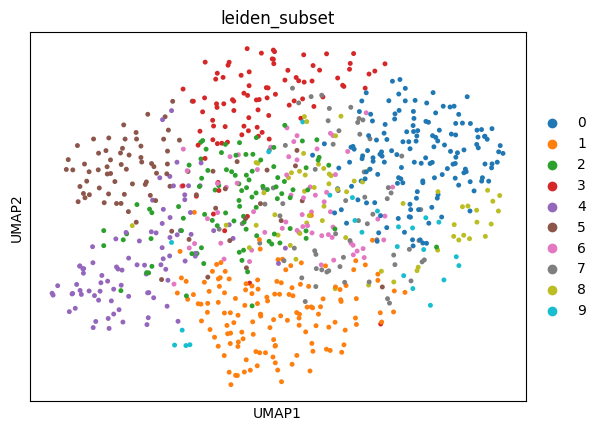

In [6]:
np.random.seed(42)
sc.settings.seed = 42

cdata = cdata[cell_ids_3].copy()

sc.pp.highly_variable_genes(cdata, n_top_genes=2000, flavor="seurat_v3")

sc.pp.normalize_total(cdata)
sc.pp.log1p(cdata)
sc.pp.scale(cdata, max_value=10)

sc.tl.pca(cdata, use_highly_variable=True)
sc.pp.neighbors(cdata, n_neighbors=15, n_pcs=30)
sc.tl.umap(cdata)

# custom umap for subset of cells
cdata.obsm['X_umap_subset'] = cdata.obsm['X_umap'].copy()

sc.tl.leiden(cdata, resolution=1, key_added='leiden_subset')
sc.pl.umap(cdata, color=['leiden_subset'], size=50)

In [7]:
# Improved rpy2 method to avoid conversion errors
def run_slingshot_via_rpy2_improved(adata, cluster_key='leiden', embedding_key='X_umap', 
                                   start_cluster=None, end_clusters=None):
    try:
        # Import R
        base = importr('base')
        utils = importr('utils')
        
        # Creating temporary 
        with tempfile.TemporaryDirectory() as temp_dir:
            print("Creating temporary files...")
            
            # Export to CSV file
            if sparse.issparse(adata.X):
                expr_df = pd.DataFrame(adata.X.toarray())
            else:
                expr_df = pd.DataFrame(adata.X)
            
            umap_df = pd.DataFrame(adata.obsm[embedding_key], columns=['UMAP1', 'UMAP2'])
            clusters_df = pd.DataFrame({'clusters': adata.obs[cluster_key].astype(str)})

            expr_file = os.path.join(temp_dir, 'expr.csv')
            umap_file = os.path.join(temp_dir, 'umap.csv')
            clusters_file = os.path.join(temp_dir, 'clusters.csv')
            
            expr_df.to_csv(expr_file, index=False)
            umap_df.to_csv(umap_file, index=False)
            clusters_df.to_csv(clusters_file, index=False)

            print("Reading data and running analysis in R...")
            
            # Build R command
            r_cmd = f'''
            # Import and load packages
            if (!requireNamespace("BiocManager", quietly = TRUE))
                install.packages("BiocManager")
            
            required_packages <- c("slingshot", "SingleCellExperiment")
            for (pkg in required_packages) {{
                if (!requireNamespace(pkg, quietly = TRUE)) {{
                    BiocManager::install(pkg)
                }}
            }}
            
            library(slingshot)
            library(SingleCellExperiment)
            
            # Load data
            expr_matrix <- as.matrix(read.csv("{expr_file}"))
            umap_coords <- as.matrix(read.csv("{umap_file}"))
            clusters <- read.csv("{clusters_file}")$clusters
            
            # Transpose gene expression matrix (gene x cell)
            expr_matrix <- t(expr_matrix)

            # Create SingleCellExperiment object
            sce <- SingleCellExperiment(
                assays = list(counts = expr_matrix)
            )
            
            # Add UMAP and cluster info
            reducedDims(sce) <- list(UMAP = umap_coords)
            colData(sce)$clusters <- clusters
            
            # Run Slingshot
            '''
            
            # Start and End cluster parameters (Optional)
            if start_cluster is not None:
                r_cmd += f'start_clus <- "{start_cluster}"\n'
                r_cmd += 'sce <- slingshot(sce, clusterLabels = "clusters", reducedDim = "UMAP", start.clus = start_clus)\n'
            else:
                r_cmd += 'sce <- slingshot(sce, clusterLabels = "clusters", reducedDim = "UMAP")\n'
            
            r_cmd += f'''

            # Get result
            pseudotimes <- slingPseudotime(sce)
            weights <- slingCurveWeights(sce)

            write.csv(pseudotimes, "{temp_dir}/pseudotimes.csv")
            write.csv(weights, "{temp_dir}/weights.csv")
            
            # Return number of trajectories
            n_lineages <- ncol(pseudotimes)
            cat("Found", n_lineages, "trajectories\\n")
            '''
            
            # Execute R
            ro.r(r_cmd)
            
            print("Reading results...")

            pseudotimes_file = os.path.join(temp_dir, 'pseudotimes.csv')
            weights_file = os.path.join(temp_dir, 'weights.csv')
            
            if os.path.exists(pseudotimes_file):
                pseudotimes_df = pd.read_csv(pseudotimes_file, index_col=0)
                weights_df = pd.read_csv(weights_file, index_col=0)
                
                # Add to adata
                for i, col in enumerate(pseudotimes_df.columns):
                    adata.obs[f'slingshot_pseudotime_{i+1}'] = pseudotimes_df.iloc[:, i].values
                
                for i, col in enumerate(weights_df.columns):
                    adata.obs[f'slingshot_weight_{i+1}'] = weights_df.iloc[:, i].values

                print(f"Slingshot analysis completed! Found {len(pseudotimes_df.columns)} trajectories")
                return adata
            else:
                print("Could not find result files")
                return None
        
    except ImportError:
        print("Error: Please install rpy2 package")
        print("Run: pip install rpy2")
        print("And install Slingshot in R: BiocManager::install('slingshot')")
        return None
    except Exception as e:
        print(f"Error running Slingshot: {e}")
        return None

In [8]:
adata = run_slingshot_via_rpy2_improved(
    cdata, 
    cluster_key='leiden_subset',
    embedding_key='X_umap_subset',
)

Creating temporary files...
Reading data and running analysis in R...


R callback write-console: Loading required package: princurve
  
R callback write-console: Loading required package: TrajectoryUtils
  
R callback write-console: Loading required package: SingleCellExperiment
  
R callback write-console: Loading required package: SummarizedExperiment
  
R callback write-console: Loading required package: MatrixGenerics
  
R callback write-console: Loading required package: matrixStats
  
R callback write-console: 
Attaching package: ‘MatrixGenerics’

  
R callback write-console: The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, c

Found 4 trajectories
Reading results...
Slingshot analysis completed! Found 4 trajectories


In [9]:
def analyze_trajectory_cluster_transitions(
    adata, cluster_key="leiden_subset", embedding_key="X_umap_subset"
):
    """
    Analyze cluster transition patterns in Slingshot trajectories (excluding clusters with NaN average pseudotime)
    """

    # Get pseudotime columns
    pseudotime_cols = [
        col for col in adata.obs.columns if col.startswith("slingshot_pseudotime")
    ]

    if not pseudotime_cols:
        print("No Slingshot pseudotime results found")
        return

    print(
        f"Analyzing cluster transition patterns for {len(pseudotime_cols)} trajectories"
    )
    print("=" * 60)

    # Analyze cluster transitions for each trajectory
    trajectory_analysis = {}

    for i, pt_col in enumerate(pseudotime_cols):
        lineage_num = i + 1
        print(f"Trajectory {lineage_num} ({pt_col}):")
        print("-" * 40)

        # Get cells on this trajectory
        valid_mask = ~np.isnan(adata.obs[pt_col])
        if valid_mask.sum() == 0:
            print("No valid cells")
            continue

        # Extract data for this trajectory
        trajectory_data = adata.obs[valid_mask].copy()
        trajectory_data = trajectory_data.sort_values(pt_col)

        # Cluster distribution
        cluster_counts = trajectory_data[cluster_key].value_counts().sort_index()
        print(f"  Involved clusters: {', '.join(cluster_counts.index.astype(str))}")
        print(f"  Cell count distribution: {dict(cluster_counts)}")

        # Calculate average pseudotime for each cluster
        cluster_pseudotime = trajectory_data.groupby(cluster_key)[pt_col].agg(
            ["mean", "std", "min", "max", "count"]
        )

        # 🔥 Key optimization: Exclude clusters with NaN average pseudotime
        valid_clusters_mask = ~np.isnan(cluster_pseudotime["mean"])
        cluster_pseudotime_filtered = cluster_pseudotime[valid_clusters_mask]

        if len(cluster_pseudotime_filtered) == 0:
            print("  Warning: No valid cluster data found for this trajectory")
            continue

        # Sort by average pseudotime
        cluster_pseudotime_filtered = cluster_pseudotime_filtered.sort_values("mean")

        print(f"  Valid clusters sorted by pseudotime:")
        for cluster_id, row in cluster_pseudotime_filtered.iterrows():
            std_str = f"{row['std']:.2f}" if not np.isnan(row["std"]) else "nan"
            print(
                f"Cluster {cluster_id}: Average pseudotime {row['mean']:.2f} ± {std_str} "
                f"(Range: {row['min']:.2f}-{row['max']:.2f}, Cell count: {row['count']})"
            )

        # Check for excluded clusters
        excluded_clusters = cluster_pseudotime[~valid_clusters_mask]
        if len(excluded_clusters) > 0:
            print(
                f"Excluded clusters (NaN average pseudotime): {', '.join([str(c) for c in excluded_clusters.index])}"
            )

        # Infer transition order (only include valid clusters)
        ordered_clusters = cluster_pseudotime_filtered.index.tolist()
        if len(ordered_clusters) > 1:
            transitions = " → ".join([str(c) for c in ordered_clusters])
            print(f"Inferred trajectory: {transitions}")
        elif len(ordered_clusters) == 1:
            print(f"Single cluster trajectory: {ordered_clusters[0]}")

        # Save analysis results
        trajectory_analysis[f"lineage_{lineage_num}"] = {
            "clusters_involved": ordered_clusters,  # Only include valid clusters
            "transition_path": ordered_clusters,  # Only include valid clusters
            "cluster_stats": cluster_pseudotime_filtered,  # Only include valid clusters' stats
            "excluded_clusters": (
                excluded_clusters.index.tolist() if len(excluded_clusters) > 0 else []
            ),  # Record excluded clusters
            "total_cells": valid_mask.sum(),
            "valid_clusters_count": len(ordered_clusters),
        }

    return trajectory_analysis

In [10]:
trajectory_analysis = analyze_trajectory_cluster_transitions(adata)

Analyzing cluster transition patterns for 4 trajectories
Trajectory 1 (slingshot_pseudotime_1):
----------------------------------------
  Involved clusters: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9
  Cell count distribution: {'0': 128, '1': 3, '2': 83, '3': 6, '4': 86, '5': 11, '6': 58, '7': 38, '8': 54, '9': 8}
  Valid clusters sorted by pseudotime:
Cluster 0: Average pseudotime 1.78 ± 1.05 (Range: 0.00-4.14, Cell count: 128.0)
Cluster 8: Average pseudotime 3.36 ± 1.43 (Range: 1.01-7.18, Cell count: 54.0)
Cluster 9: Average pseudotime 3.52 ± 1.42 (Range: 2.19-6.81, Cell count: 8.0)
Cluster 7: Average pseudotime 3.63 ± 1.02 (Range: 1.87-5.88, Cell count: 38.0)
Cluster 6: Average pseudotime 4.45 ± 1.08 (Range: 2.49-7.29, Cell count: 58.0)
Cluster 2: Average pseudotime 5.51 ± 1.08 (Range: 2.26-8.16, Cell count: 83.0)
Cluster 1: Average pseudotime 5.67 ± 1.41 (Range: 4.07-6.77, Cell count: 3.0)
Cluster 3: Average pseudotime 5.69 ± 0.25 (Range: 5.29-5.99, Cell count: 6.0)
Cluster 5: Average pseudotim

In [11]:
# Create trajectory-cluster transition visualization (optimized version)
def plot_trajectory_cluster_transitions(
    adata,
    trajectory_analysis,
    cluster_key="leiden_subset",
    embedding_key="X_umap_subset",
):
    """
    Visualize Slingshot trajectories with cluster transitions and pseudotime distribution
    """
    pseudotime_cols = [
        col for col in adata.obs.columns if col.startswith("slingshot_pseudotime")
    ]
    n_lineages = len(pseudotime_cols)

    fig, axes = plt.subplots(2, n_lineages, figsize=(5 * n_lineages, 10))
    if n_lineages == 1:
        axes = axes.reshape(-1, 1)

    umap_coords = adata.obsm[embedding_key]

    # Calculate cluster centers
    cluster_centers = {}
    unique_clusters = adata.obs[cluster_key].unique()
    for cluster in unique_clusters:
        cluster_mask = adata.obs[cluster_key] == cluster
        center = umap_coords[cluster_mask].mean(axis=0)
        cluster_centers[cluster] = center

    # Create a plot for each trajectory
    for i, (lineage_key, analysis) in enumerate(trajectory_analysis.items()):
        if i >= n_lineages:
            break

        pt_col = pseudotime_cols[i]

        # Top row: cluster plot with trajectory path
        ax1 = axes[0, i]

        # Draw all clusters (faded)
        for j, cluster in enumerate(unique_clusters):
            cluster_mask = adata.obs[cluster_key] == cluster
            ax1.scatter(
                umap_coords[cluster_mask, 0],
                umap_coords[cluster_mask, 1],
                label=f"Cluster {cluster}",
                alpha=0.3,
                s=15,
                color="lightgray",
            )

        # Highlight involved clusters
        involved_clusters = analysis["clusters_involved"]
        excluded_clusters = analysis["excluded_clusters"]

        # Draw involved clusters
        for cluster in involved_clusters:
            cluster_mask = adata.obs[cluster_key] == cluster
            ax1.scatter(
                umap_coords[cluster_mask, 0],
                umap_coords[cluster_mask, 1],
                label=f"Cluster {cluster}",
                alpha=0.7,
                s=30,
                color=plt.cm.Set1(involved_clusters.index(cluster)),
            )

            # Mark cluster centers
            center = cluster_centers[cluster]
            ax1.annotate(
                f"C{cluster}",
                (center[0], center[1]),
                xytext=(5, 5),
                textcoords="offset points",
                fontsize=12,
                fontweight="bold",
                color="black",
            )

        # Mark excluded clusters
        for cluster in excluded_clusters:
            cluster_mask = adata.obs[cluster_key] == cluster
            ax1.scatter(
                umap_coords[cluster_mask, 0],
                umap_coords[cluster_mask, 1],
                alpha=0.5,
                s=20,
                color="red",
                marker="x",
            )

            center = cluster_centers[cluster]
            ax1.annotate(
                f"C{cluster}(❌)",
                (center[0], center[1]),
                xytext=(5, 5),
                textcoords="offset points",
                fontsize=10,
                color="red",
                style="italic",
            )

        # Draw arrows between involved clusters
        if len(involved_clusters) > 1:
            for j in range(len(involved_clusters) - 1):
                start_cluster = involved_clusters[j]
                end_cluster = involved_clusters[j + 1]
                start_pos = cluster_centers[start_cluster]
                end_pos = cluster_centers[end_cluster]

                arrow = FancyArrowPatch(
                    start_pos,
                    end_pos,
                    arrowstyle="->",
                    mutation_scale=20,
                    color="red",
                    linewidth=3,
                    alpha=0.8,
                )
                ax1.add_patch(arrow)

        # Update title with valid path and excluded clusters
        valid_path = " → ".join([str(c) for c in involved_clusters])
        excluded_info = (
            f" (Excluded: {','.join(map(str, excluded_clusters))})"
            if excluded_clusters
            else ""
        )
        ax1.set_title(f"Trajectory {i+1}: {valid_path}{excluded_info}", fontsize=10)
        ax1.set_xlabel("UMAP1")
        ax1.set_ylabel("UMAP2")

        # Bottom row: Pseudotime distribution
        ax2 = axes[1, i]

        # Only show cells on this trajectory
        valid_mask = ~np.isnan(adata.obs[pt_col])

        if valid_mask.sum() > 0:
            scatter = ax2.scatter(
                umap_coords[valid_mask, 0],
                umap_coords[valid_mask, 1],
                c=adata.obs[pt_col][valid_mask],
                cmap="viridis",
                alpha=0.7,
                s=20,
            )
            plt.colorbar(scatter, ax=ax2, shrink=0.8)
            ax2.set_title(f"Trajectory {i+1} Pseudotime Distribution")
        else:
            ax2.text(0.5, 0.5, "No valid cells", ha="center", va="center")
            ax2.set_title(f"Trajectory {i+1} - No Data")

        ax2.set_xlabel("UMAP1")
        ax2.set_ylabel("UMAP2")

    plt.tight_layout()
    plt.show()

    return fig, axes

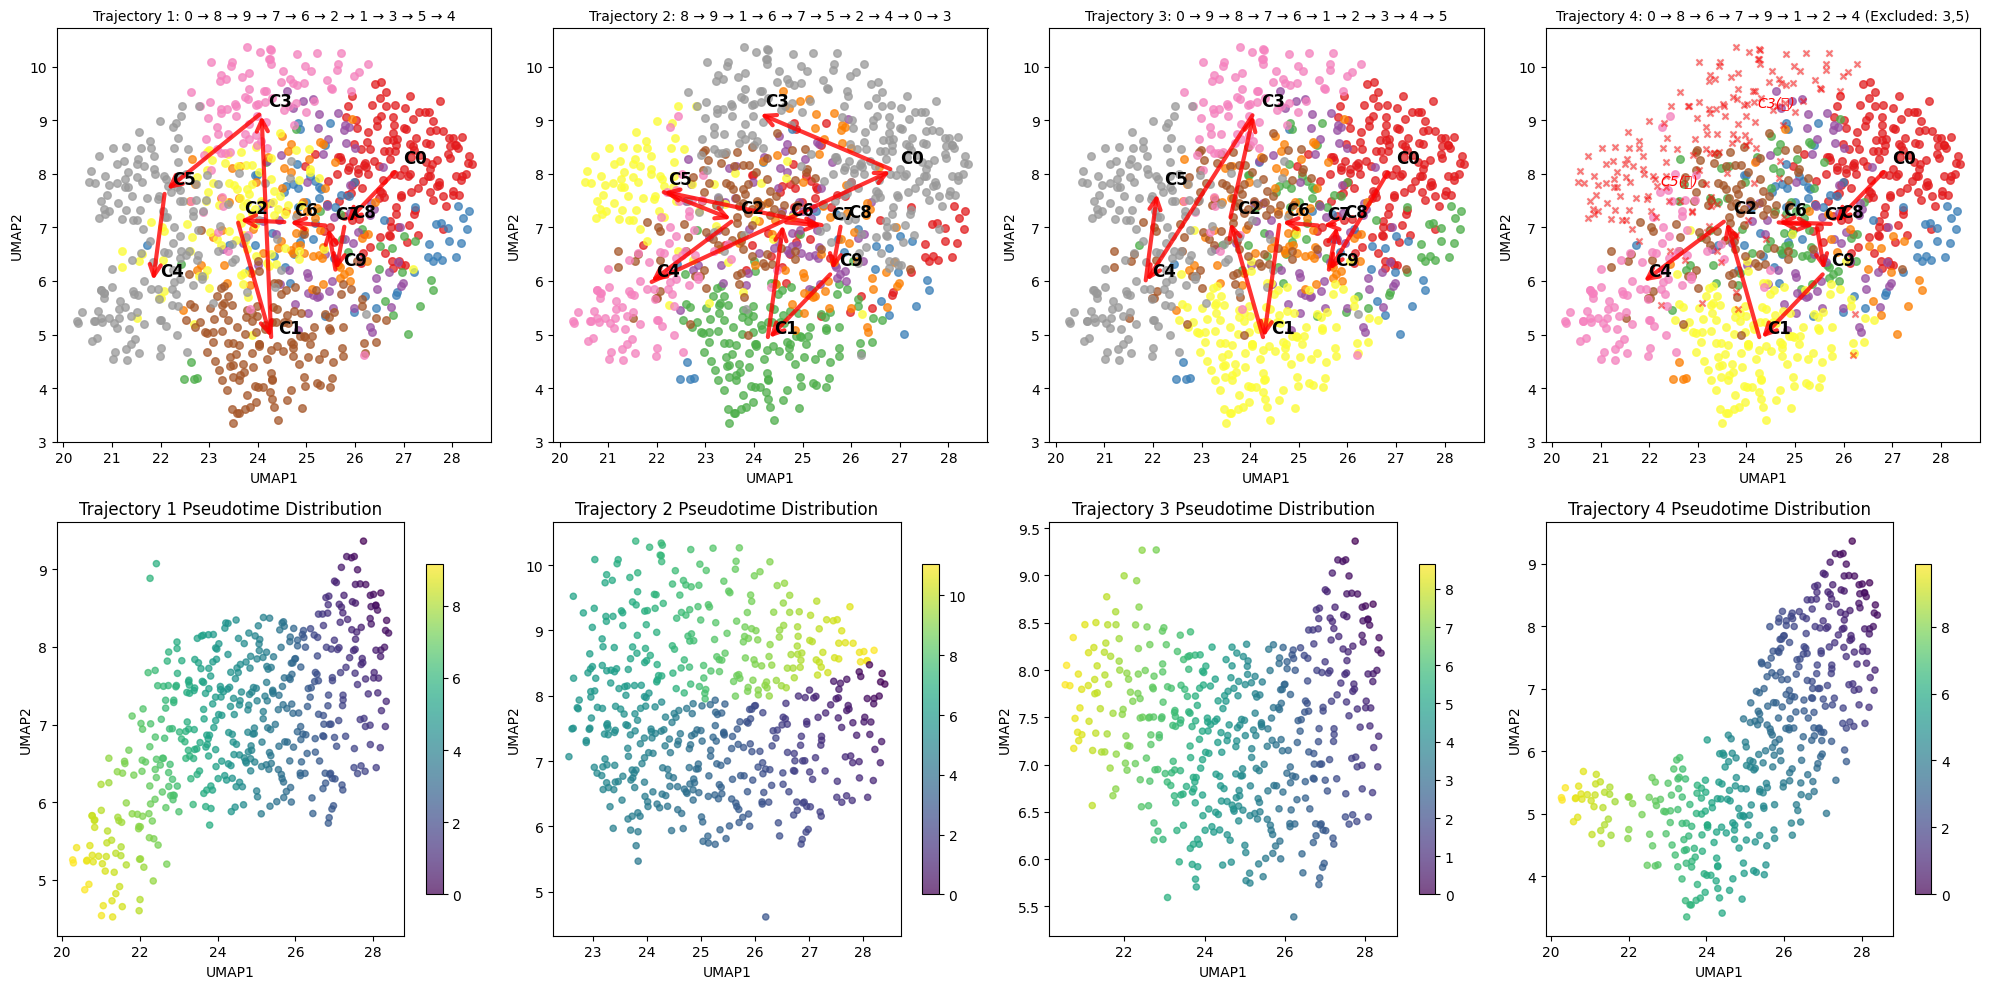

(<Figure size 2000x1000 with 12 Axes>,
 array([[<Axes: title={'center': 'Trajectory 1: 0 → 8 → 9 → 7 → 6 → 2 → 1 → 3 → 5 → 4'}, xlabel='UMAP1', ylabel='UMAP2'>,
         <Axes: title={'center': 'Trajectory 2: 8 → 9 → 1 → 6 → 7 → 5 → 2 → 4 → 0 → 3'}, xlabel='UMAP1', ylabel='UMAP2'>,
         <Axes: title={'center': 'Trajectory 3: 0 → 9 → 8 → 7 → 6 → 1 → 2 → 3 → 4 → 5'}, xlabel='UMAP1', ylabel='UMAP2'>,
         <Axes: title={'center': 'Trajectory 4: 0 → 8 → 6 → 7 → 9 → 1 → 2 → 4 (Excluded: 3,5)'}, xlabel='UMAP1', ylabel='UMAP2'>],
        [<Axes: title={'center': 'Trajectory 1 Pseudotime Distribution'}, xlabel='UMAP1', ylabel='UMAP2'>,
         <Axes: title={'center': 'Trajectory 2 Pseudotime Distribution'}, xlabel='UMAP1', ylabel='UMAP2'>,
         <Axes: title={'center': 'Trajectory 3 Pseudotime Distribution'}, xlabel='UMAP1', ylabel='UMAP2'>,
         <Axes: title={'center': 'Trajectory 4 Pseudotime Distribution'}, xlabel='UMAP1', ylabel='UMAP2'>]],
       dtype=object))

In [12]:
plot_trajectory_cluster_transitions(adata, trajectory_analysis)

In [14]:
def analyze_trajectory_relationships(trajectory_analysis):
    """
    Analyze relationships between trajectories to find subsets and branching points
    """
    print("="*60)
    
    relationships = []
    all_lineages = list(trajectory_analysis.keys())
    
    # Check each pair of trajectories for subset or branching relationships
    for i, lineage1 in enumerate(all_lineages):
        for j, lineage2 in enumerate(all_lineages):
            if i >= j:
                continue
                
            path1 = trajectory_analysis[lineage1]['clusters_involved']
            path2 = trajectory_analysis[lineage2]['clusters_involved']
            
            # Check for subset relationship
            if is_subpath(path1, path2):
                relationships.append({
                    'type': 'subset',
                    'shorter': lineage1,
                    'longer': lineage2,
                    'shorter_path': path1,
                    'longer_path': path2,
                    'divergence_point': len(path1),
                    'extension': path2[len(path1):]
                })
            elif is_subpath(path2, path1):
                relationships.append({
                    'type': 'subset',
                    'shorter': lineage2, 
                    'longer': lineage1,
                    'shorter_path': path2,
                    'longer_path': path1,
                    'divergence_point': len(path2),
                    'extension': path1[len(path2):]
                })
            else:
                # Check for common prefix
                common_prefix = find_common_prefix(path1, path2)
                if len(common_prefix) > 1:  # At least 2 common steps
                    relationships.append({
                        'type': 'branching',
                        'lineage1': lineage1,
                        'lineage2': lineage2,
                        'path1': path1,
                        'path2': path2,
                        'common_prefix': common_prefix,
                        'branch1': path1[len(common_prefix):],
                        'branch2': path2[len(common_prefix):],
                        'divergence_point': len(common_prefix)
                    })
    
    # Show results
    if not relationships:
        print("No relationships found between trajectories.")
        return relationships
    
    subset_relations = [r for r in relationships if r['type'] == 'subset']
    branching_relations = [r for r in relationships if r['type'] == 'branching']
    
    # Show subset relationships
    if subset_relations:
        print("\\n📦 Found subset relationships:")
        for rel in subset_relations:
            shorter_num = rel['shorter'].split('_')[1]
            longer_num = rel['longer'].split('_')[1]
            print(f"Trajectory {shorter_num} ⊆ Trajectory {longer_num}")
            print(f"Shorter path: {' → '.join(map(str, rel['shorter_path']))}")
            print(f"Longer path: {' → '.join(map(str, rel['longer_path']))}")
            print(f"Divergence point: Step {rel['divergence_point']} (Cluster {rel['shorter_path'][-1]})")
            print(f"Extension: {' → '.join(map(str, rel['extension']))}")

            # Analyze cell counts
            shorter_cells = trajectory_analysis[rel['shorter']]['total_cells']
            longer_cells = trajectory_analysis[rel['longer']]['total_cells']
            print(f"    Cell counts: Shorter ({shorter_cells}) vs Longer ({longer_cells})")

    # Show branching relationships
    if branching_relations:
        print("Found branching relationships:")
        for rel in branching_relations:
            lineage1_num = rel['lineage1'].split('_')[1]
            lineage2_num = rel['lineage2'].split('_')[1]
            print(f"Trajectory {lineage1_num} ↔ Trajectory {lineage2_num}")
            print(f"Common prefix: {' → '.join(map(str, rel['common_prefix']))}")
            print(f"Branch 1: {' → '.join(map(str, rel['branch1']))}")
            print(f"Branch 2: {' → '.join(map(str, rel['branch2']))}")
            print(f"Divergence point: Step {rel['divergence_point']} (Cluster {rel['common_prefix'][-1]})")

    return relationships

def is_subpath(shorter_path, longer_path):
    """Check if shorter_path is a prefix of longer_path"""
    if len(shorter_path) > len(longer_path):
        return False
    return shorter_path == longer_path[:len(shorter_path)]

def find_common_prefix(path1, path2):
    """Find the common prefix between two paths"""
    common = []
    for i in range(min(len(path1), len(path2))):
        if path1[i] == path2[i]:
            common.append(path1[i])
        else:
            break
    return common

def suggest_trajectory_merging(trajectory_analysis, relationships):
    """
    Based on subset relationships, suggest trajectory merging
    """
    print("="*50)
    
    subset_relations = [r for r in relationships if r['type'] == 'subset']
    
    if not subset_relations:
        print("No subset relationships found, no merging suggestions.")
        return
    
    for rel in subset_relations:
        shorter_num = rel['shorter'].split('_')[1]
        longer_num = rel['longer'].split('_')[1]

        print(f"Suggest merging Trajectory {shorter_num} and Trajectory {longer_num}:")
        print(f"Reason: Trajectory {shorter_num} is a complete subset of Trajectory {longer_num}")

        # Analyze biological significance based on cell counts
        shorter_cells = trajectory_analysis[rel['shorter']]['total_cells']
        longer_cells = trajectory_analysis[rel['longer']]['total_cells']
        
        if shorter_cells > longer_cells * 0.8:
            print(f"biological explanation: Possible early differentiation stalling")
            print(f"- Most cells remain at cluster {rel['shorter_path'][-1]} (differentiation point)")
            print(f"- Some cells continue to differentiate into {' → '.join(map(str, rel['extension']))}")
        else:
            print(f"biological explanation: Possible branching differentiation")
            print(f"- main differentiation path: {' → '.join(map(str, rel['longer_path']))}")
            print(f"- Some cells terminate early at cluster {rel['shorter_path'][-1]}")
        
        print(f"the unified after merging path:  {' → '.join(map(str, rel['longer_path']))}")
        print(f"key differentiation point: Cluster {rel['shorter_path'][-1]} → Cluster {rel['extension'][0] if rel['extension'] else 'N/A'}")

In [15]:
relationships = analyze_trajectory_relationships(trajectory_analysis)
suggest_trajectory_merging(trajectory_analysis, relationships)

Found branching relationships:
Trajectory 1 ↔ Trajectory 4
Common prefix: 0 → 8
Branch 1: 9 → 7 → 6 → 2 → 1 → 3 → 5 → 4
Branch 2: 6 → 7 → 9 → 1 → 2 → 4
Divergence point: Step 2 (Cluster 8)
No subset relationships found, no merging suggestions.


Trajectory Merging Strategies:
1. keep_longer: keep the longer trajectory, remove the shorter one
2. keep_shorter: keep the shorter trajectory as the main path, mark the longer one as an extension
3. combine: create a combined trajectory, including divergence information
4. no_merge: keep the original trajectories unchanged
Default strategy: keep_longer
Executing trajectory merging based on subset relationships
No subset relationships found, no merging needed.
Summary of Merged Trajectories:
Lineage 1:
Trajectory: 0 → 8 → 9 → 7 → 6 → 2 → 1 → 3 → 5 → 4
Cell Count: 475
Lineage 2:
Trajectory: 8 → 9 → 1 → 6 → 7 → 5 → 2 → 4 → 0 → 3
Cell Count: 518
Lineage 3:
Trajectory: 0 → 9 → 8 → 7 → 6 → 1 → 2 → 3 → 4 → 5
Cell Count: 460
Lineage 4:
Trajectory: 0 → 8 → 6 → 7 → 9 → 1 → 2 → 4
Cell Count: 405
Visualize the merged trajectories


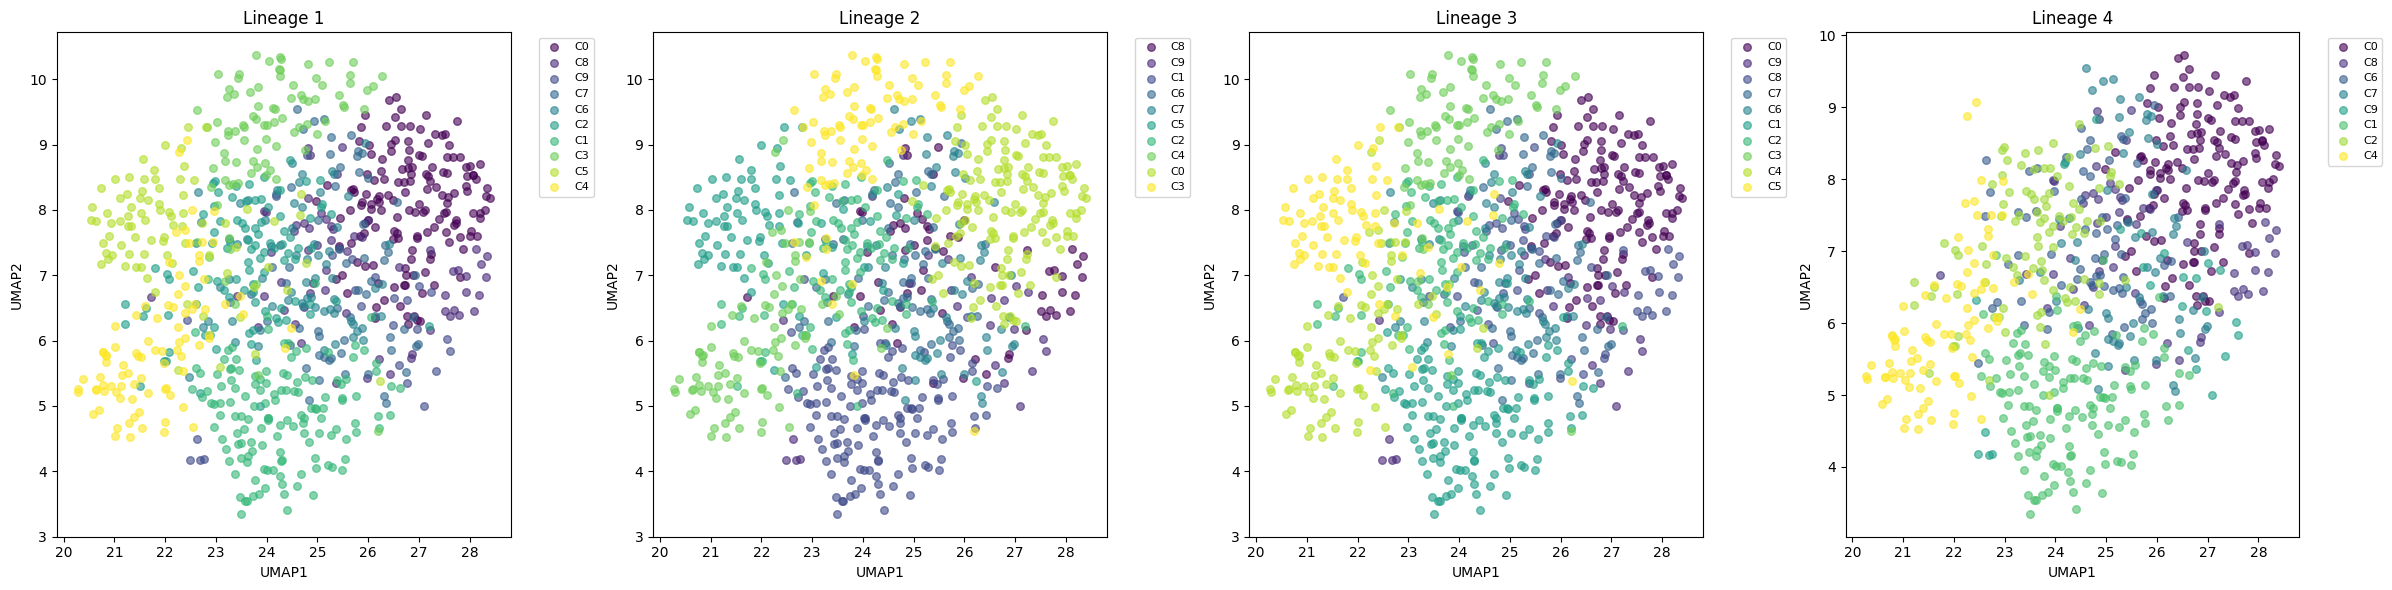

In [ ]:
def merge_subset_trajectories(adata, trajectory_analysis, relationships, merge_strategy='keep_longer'):
    """
    Merge trajectories that have subset relationships.
    """
    print("Executing trajectory merging based on subset relationships")
    print("="*50)
    
    subset_relations = [r for r in relationships if r['type'] == 'subset']
    
    if not subset_relations:
        print("No subset relationships found, no merging needed.")
        return trajectory_analysis
    
    merged_analysis = trajectory_analysis.copy()
    
    for rel in subset_relations:
        shorter_key = rel['shorter']
        longer_key = rel['longer']
        shorter_num = shorter_key.split('_')[1]
        longer_num = longer_key.split('_')[1]
        
        print(f"Merged trajectory {shorter_num} into {longer_num}")
        
        if merge_strategy == 'keep_longer':
            if shorter_key in merged_analysis:
                del merged_analysis[shorter_key]

            if longer_key in merged_analysis:
                merged_analysis[longer_key]['merger_info'] = {
                    'merged_from': shorter_key,
                    'divergence_point': rel['divergence_point'],
                    'divergence_cluster': rel['shorter_path'][-1],
                    'extension_path': rel['extension'],
                    'cells_before_divergence': trajectory_analysis[shorter_key]['total_cells'],
                    'cells_after_divergence': trajectory_analysis[longer_key]['total_cells'] - trajectory_analysis[shorter_key]['total_cells']
                }
            
        elif merge_strategy == 'keep_shorter':
            # Keep the shorter trajectory as the main path and mark the longer trajectory as an extension
            print(f"Strategy: Keep main trajectory {shorter_num}, mark trajectory {longer_num} as extension")
            merged_analysis[shorter_key]['extension_info'] = {
                'extended_in': longer_key,
                'extension_path': rel['extension'],
                'total_extended_cells': trajectory_analysis[longer_key]['total_cells']
            }
            del merged_analysis[longer_key]
            
        elif merge_strategy == 'combine':
            # Combine the paths into a new trajectory
            combined_key = f"combined_{shorter_num}_{longer_num}"
            merged_analysis[combined_key] = {
                'clusters_involved': rel['longer_path'],
                'transition_path': rel['longer_path'],
                'main_branch': rel['shorter_path'],
                'extension_branch': rel['extension'],
                'divergence_point': rel['divergence_point'],
                'divergence_cluster': rel['shorter_path'][-1],
                'main_branch_cells': trajectory_analysis[shorter_key]['total_cells'],
                'extension_cells': trajectory_analysis[longer_key]['total_cells'] - trajectory_analysis[shorter_key]['total_cells'],
                'total_cells': trajectory_analysis[longer_key]['total_cells'],
                'original_trajectories': [shorter_key, longer_key]
            }
            # Delete the original trajectories
            del merged_analysis[shorter_key]
            del merged_analysis[longer_key]
    
    return merged_analysis

def visualize_merged_trajectories(adata, merged_analysis, embedding_key='X_umap_subset'):
    """
    Visualize the merged trajectories in UMAP space
    """
    import matplotlib.pyplot as plt
    import numpy as np

    print("Visualize the merged trajectories")
    print("="*40)
    
    remaining_trajectories = list(merged_analysis.keys())
    n_traj = len(remaining_trajectories)
    
    if n_traj == 0:
        print("No trajectories to visualize")
        return
    
    fig, axes = plt.subplots(1, n_traj, figsize=(6*n_traj, 6))
    if n_traj == 1:
        axes = [axes]
    
    umap_coords = adata.obsm[embedding_key]
    
    for i, (traj_key, traj_info) in enumerate(merged_analysis.items()):
        ax = axes[i]
        
        # Get trajectories
        if 'clusters_involved' in traj_info:
            clusters = traj_info['clusters_involved']
        else:
            continue

        colors = plt.cm.viridis(np.linspace(0, 1, len(clusters)))
        
        for j, cluster in enumerate(clusters):
            cluster_mask = adata.obs['leiden_subset'] == cluster
            ax.scatter(umap_coords[cluster_mask, 0], umap_coords[cluster_mask, 1], 
                      color=colors[j], alpha=0.6, s=30, label=f'C{cluster}')
        
        # Mark special information
        if 'merger_info' in traj_info:
            info = traj_info['merger_info']
            div_cluster = info['divergence_cluster']
            ax.set_title(f'{traj_key.replace("_", " ").title()}\\n'
                        f'(Merging trajectories, divergence points: C{div_cluster})')
        elif 'extension_info' in traj_info:
            ax.set_title(f'{traj_key.replace("_", " ").title()} (Main trajectory)')
        elif 'combined' in traj_key:
            info = traj_info
            div_cluster = info['divergence_cluster']
            ax.set_title(f'Combined trajectory (Divergence point: C{div_cluster})')
        else:
            ax.set_title(f'{traj_key.replace("_", " ").title()}')
        
        ax.set_xlabel('UMAP1')
        ax.set_ylabel('UMAP2')
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    
    plt.tight_layout()
    plt.show()


print("Trajectory Merging Strategies:")
print("1. keep_longer: keep the longer trajectory, remove the shorter one")
print("2. keep_shorter: keep the shorter trajectory as the main path, mark the longer one as an extension")
print("3. combine: create a combined trajectory, including divergence information")
print("4. no_merge: keep the original trajectories unchanged")


# Default strategy(keep_longer)
print("Default strategy: keep_longer")
merged_trajectory_analysis = merge_subset_trajectories(adata, trajectory_analysis, relationships, 'keep_longer')

# Show
print("Summary of Merged Trajectories:")
print("="*50)
for traj_key, traj_info in merged_trajectory_analysis.items():
    traj_num = traj_key.split('_')[1] if '_' in traj_key else traj_key
    path = ' → '.join(map(str, traj_info['clusters_involved']))
    cells = traj_info['total_cells']
    
    print(f"{traj_key.replace('_', ' ').title()}:")
    print(f"Trajectory: {path}")
    print(f"Cell Count: {cells}")

    if 'merger_info' in traj_info:
        merger = traj_info['merger_info']
        print(f"Divergence Information:")
        print(f"Divergence Point: Cluster {merger['divergence_cluster']}")
        print(f"Main Branch Cells: {merger['cells_before_divergence']}")
        print(f"Extension Cells: {merger['cells_after_divergence']}")
        print(f"Extension Path: {' → '.join(map(str, merger['extension_path']))}")

visualize_merged_trajectories(adata, merged_trajectory_analysis)

In [17]:

def analyze_gene_expression_along_trajectories(adata, gene_names, trajectory_analysis=None, use_merged=True):
    """
    Analyze the expression of specified genes along trajectories based on pseudotime.
    """
    
    # input gene_names can be a single gene or a list of genes
    if isinstance(gene_names, str):
        gene_names = [gene_names]
    
    # Using merged trajectory analysis if available
    if trajectory_analysis is None:
        if use_merged and 'merged_trajectory_analysis' in globals():
            traj_analysis = merged_trajectory_analysis
            print("Using merged trajectory analysis")
        else:
            traj_analysis = globals().get('trajectory_analysis', {})
            print("Using original trajectory analysis")
    else:
        traj_analysis = trajectory_analysis
    
    if not traj_analysis:
        print("Do not find any trajectory analysis data")
        return
    
    print(f"Gene Analysis: {', '.join(gene_names)}")
    print(f"Number of Trajectories: {len(traj_analysis)}")
    print("="*60)

    # Check for available genes
    available_genes = []
    missing_genes = []
    
    for gene in gene_names:
        if gene in adata.var_names:
            available_genes.append(gene)
        else:
            missing_genes.append(gene)
    
    if missing_genes:
        print(f"Gene No found: {', '.join(missing_genes)}")
        
        # Try to find similar genes in highly variable genes
        for missing_gene in missing_genes:
            # Search in highly variable genes
            if hasattr(adata.var, 'highly_variable'):
                hvg_genes = adata.var_names[adata.var.highly_variable]
                matches = [g for g in hvg_genes if missing_gene.lower() in g.lower()]
                if matches:
                    print(f"'{missing_gene}' possibly match: {matches[:5]}")
    
    if not available_genes:
        print("No available genes for analysis")
        return
    
    print(f"available analyzable genes: {', '.join(available_genes)}")

    # Get all pseudotime columns
    pseudotime_cols = [col for col in adata.obs.columns if col.startswith('slingshot_pseudotime')]
    
    # Create analysis for each gene
    for gene in available_genes:
        print(f"Analyzing: {gene}")
        print("-"*50)
        
        # Get gene expression data
        gene_idx = adata.var_names.get_loc(gene)
        if hasattr(adata.X, 'toarray'):
            gene_expression = adata.X[:, gene_idx].toarray().flatten()
        else:
            gene_expression = adata.X[:, gene_idx]
        
        # Analyze each trajectory
        trajectory_data = {}
        
        for traj_key, traj_info in traj_analysis.items():
            if 'clusters_involved' not in traj_info:
                continue
                
            traj_num = traj_key.split('_')[-1] if '_' in traj_key else traj_key
            
            # Find the corresponding pseudotime column
            pt_col = None
            for col in pseudotime_cols:
                if col.endswith(f'_{traj_num}'):
                    pt_col = col
                    break
            
            if pt_col is None:
                print(f"No pseudotime data found for trajectory {traj_num}")
                continue
            
            # Get valid cells for this trajectory
            valid_mask = ~np.isnan(adata.obs[pt_col])
            if valid_mask.sum() == 0:
                continue
            
            # Extract pseudotime and gene expression for valid cells    
            pseudotime = adata.obs[pt_col][valid_mask].values
            expression = gene_expression[valid_mask]
            
            # Calculate Spearman correlation
            correlation, p_value = stats.spearmanr(pseudotime, expression)
            
            trajectory_data[traj_key] = {
                'pseudotime': pseudotime,
                'expression': expression,
                'correlation': correlation,
                'p_value': p_value,
                'n_cells': len(pseudotime),
                'traj_name': f"Trajectory{traj_num}"
            }
            
            print(f"{trajectory_data[traj_key]['traj_name']}: "
                  f"Correlation={correlation:.3f}, p={p_value:.3e}, Cell Counts={len(pseudotime)}")
        
        # Visualize the gene expression along trajectories
        visualize_gene_trajectory_expression(gene, trajectory_data, traj_analysis)
    
    return trajectory_data

def visualize_gene_trajectory_expression(gene_name, trajectory_data, traj_analysis):
    """
    Visualize gene expression along trajectories with scatter plots and trend lines.
    """
    n_trajectories = len(trajectory_data)
    if n_trajectories == 0:
        return

    # Create figure
    fig, axes = plt.subplots(2, n_trajectories, figsize=(6*n_trajectories, 10))
    if n_trajectories == 1:
        axes = axes.reshape(-1, 1)
    
    colors = plt.cm.Set1(np.linspace(0, 1, n_trajectories))
    
    for i, (traj_key, data) in enumerate(trajectory_data.items()):
        pseudotime = data['pseudotime']
        expression = data['expression']
        correlation = data['correlation']
        p_value = data['p_value']
        traj_name = data['traj_name']
        
        # Top plot: Scatter plot with trend line
        ax1 = axes[0, i]
        
        # Scatter Plot
        scatter = ax1.scatter(pseudotime, expression, alpha=0.6, c=colors[i], s=20)
        
        # Add trend line using a moving average
        if len(pseudotime) > 10:
            try:
                # Sort pseudotime and expression for trend line
                sorted_idx = np.argsort(pseudotime)
                x_sorted = pseudotime[sorted_idx]
                y_sorted = expression[sorted_idx]
                
                # Used moving average smoothing
                window_size = max(10, len(x_sorted) // 20)
                if len(x_sorted) >= window_size:
                    y_smooth = np.convolve(y_sorted, np.ones(window_size)/window_size, mode='same')
                    ax1.plot(x_sorted, y_smooth, color='red', linewidth=2, alpha=0.8)
            except:
                pass
        
        # Set title and labels
        significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"
        ax1.set_title(f'{traj_name} {gene_name} expression relativity: {correlation:.3f} ({significance})')
        ax1.set_xlabel('Pseudotime')
        ax1.set_ylabel(f'{gene_name} expression')
        
        # Bottom plot: Binned average expression
        ax2 = axes[1, i]
        
        # Bin the pseudotime
        n_bins = min(20, len(pseudotime) // 10)
        if n_bins >= 3:
            bins = np.linspace(pseudotime.min(), pseudotime.max(), n_bins)
            bin_centers = []
            bin_means = []
            bin_stds = []
            
            for j in range(len(bins)-1):
                mask = (pseudotime >= bins[j]) & (pseudotime < bins[j+1])
                if mask.sum() > 0:
                    bin_centers.append((bins[j] + bins[j+1]) / 2)
                    bin_means.append(expression[mask].mean())
                    bin_stds.append(expression[mask].std())
            
            if bin_centers:
                bin_centers = np.array(bin_centers)
                bin_means = np.array(bin_means)
                bin_stds = np.array(bin_stds)
                
                # Draw binned average expression
                ax2.plot(bin_centers, bin_means, color=colors[i], linewidth=3, marker='o')
                ax2.fill_between(bin_centers, bin_means - bin_stds, bin_means + bin_stds, 
                               alpha=0.3, color=colors[i])
        
        ax2.set_title(f'{traj_name} - binned average expression')
        ax2.set_xlabel('Pseudotime')
        ax2.set_ylabel(f'{gene_name} average expression')

    plt.tight_layout()
    plt.show()
    
    # Create a comparison plot if there are multiple trajectories
    if n_trajectories > 1:
        create_trajectory_comparison_plot(gene_name, trajectory_data)

def create_trajectory_comparison_plot(gene_name, trajectory_data):
    """
    Create a comparison plot for gene expression across trajectories.
    """

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Left plot: Scatter plot of all trajectories
    colors = plt.cm.Set1(np.linspace(0, 1, len(trajectory_data)))
    
    for i, (traj_key, data) in enumerate(trajectory_data.items()):
        ax1.scatter(data['pseudotime'], data['expression'], 
                   alpha=0.6, c=[colors[i]], s=20, label=data['traj_name'])

    ax1.set_xlabel('Pseudotime')
    ax1.set_ylabel(f'{gene_name} expression')
    ax1.set_title(f'{gene_name} expression across trajectories')
    ax1.legend()
    
    # Right plot: Correlation with pseudotime
    traj_names = [data['traj_name'] for data in trajectory_data.values()]
    correlations = [data['correlation'] for data in trajectory_data.values()]
    p_values = [data['p_value'] for data in trajectory_data.values()]
    
    bars = ax2.bar(range(len(traj_names)), correlations, color=colors)
    ax2.set_xticks(range(len(traj_names)))
    ax2.set_xticklabels(traj_names)
    ax2.set_ylabel('Spearman correlation coefficient')
    ax2.set_title(f'{gene_name} correlation with Pseudotime')
    ax2.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    
    # Added significance markers above the bars
    for i, (bar, p_val) in enumerate(zip(bars, p_values)):
        height = bar.get_height()
        significance = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else "ns"
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01 if height >= 0 else height - 0.05,
                significance, ha='center', va='bottom' if height >= 0 else 'top')
    
    plt.tight_layout()
    plt.show()


def show_highly_variable_genes(adata, n_genes=20):
    """
    Show available highly variable genes in the dataset.
    """
    print(f"available genes: {n_genes}")
    print("="*50)
    
    if hasattr(adata.var, 'highly_variable'):
        hvg_genes = adata.var_names[adata.var.highly_variable]
        print(f"Totally {len(hvg_genes)} highly variable genes found.")
        print("Top{}Genes:".format(n_genes))
        for i, gene in enumerate(hvg_genes[:n_genes]):
            print(f"  {i+1:2d}. {gene}")
        
        if len(hvg_genes) > n_genes:
            print(f"... Still have {len(hvg_genes) - n_genes} genes")
    else:
        print("No found highly variable genes in the dataset.")
        print(f"Total gene counts: {adata.n_vars}")
        print("Top{}Genes:".format(n_genes))
        for i, gene in enumerate(adata.var_names[:n_genes]):
            print(f"  {i+1:2d}. {gene}")

show_highly_variable_genes(adata, 30)

available genes: 30
Totally 2000 highly variable genes found.
Top30Genes:
   1. PLEKHN1
   2. ISG15
   3. TNFRSF18
   4. SCNN1D
   5. DVL1
   6. VWA1
   7. ATAD3A
   8. TMEM240
   9. PRKCZ
  10. PANK4
  11. TP73
  12. CEP104
  13. RNF207
  14. GPR153
  15. ERRFI1
  16. SPSB1
  17. UBE4B
  18. FBXO44
  19. AGTRAP
  20. FBLIM1
  21. UQCRHL
  22. SPEN
  23. CPLANE2
  24. NECAP2
  25. CROCC
  26. MFAP2
  27. IGSF21
  28. ALDH4A1
  29. UBR4
  30. OTUD3
... Still have 1970 genes


Using merged trajectory analysis
Gene Analysis: ISG15, WNT4, C1QA, PDPN, TP73
Number of Trajectories: 4
available analyzable genes: ISG15, WNT4, C1QA, PDPN, TP73
Analyzing: ISG15
--------------------------------------------------
Trajectory1: Correlation=0.020, p=6.600e-01, Cell Counts=475
Trajectory2: Correlation=0.085, p=5.404e-02, Cell Counts=518
Trajectory3: Correlation=0.049, p=2.975e-01, Cell Counts=460
Trajectory4: Correlation=0.065, p=1.933e-01, Cell Counts=405


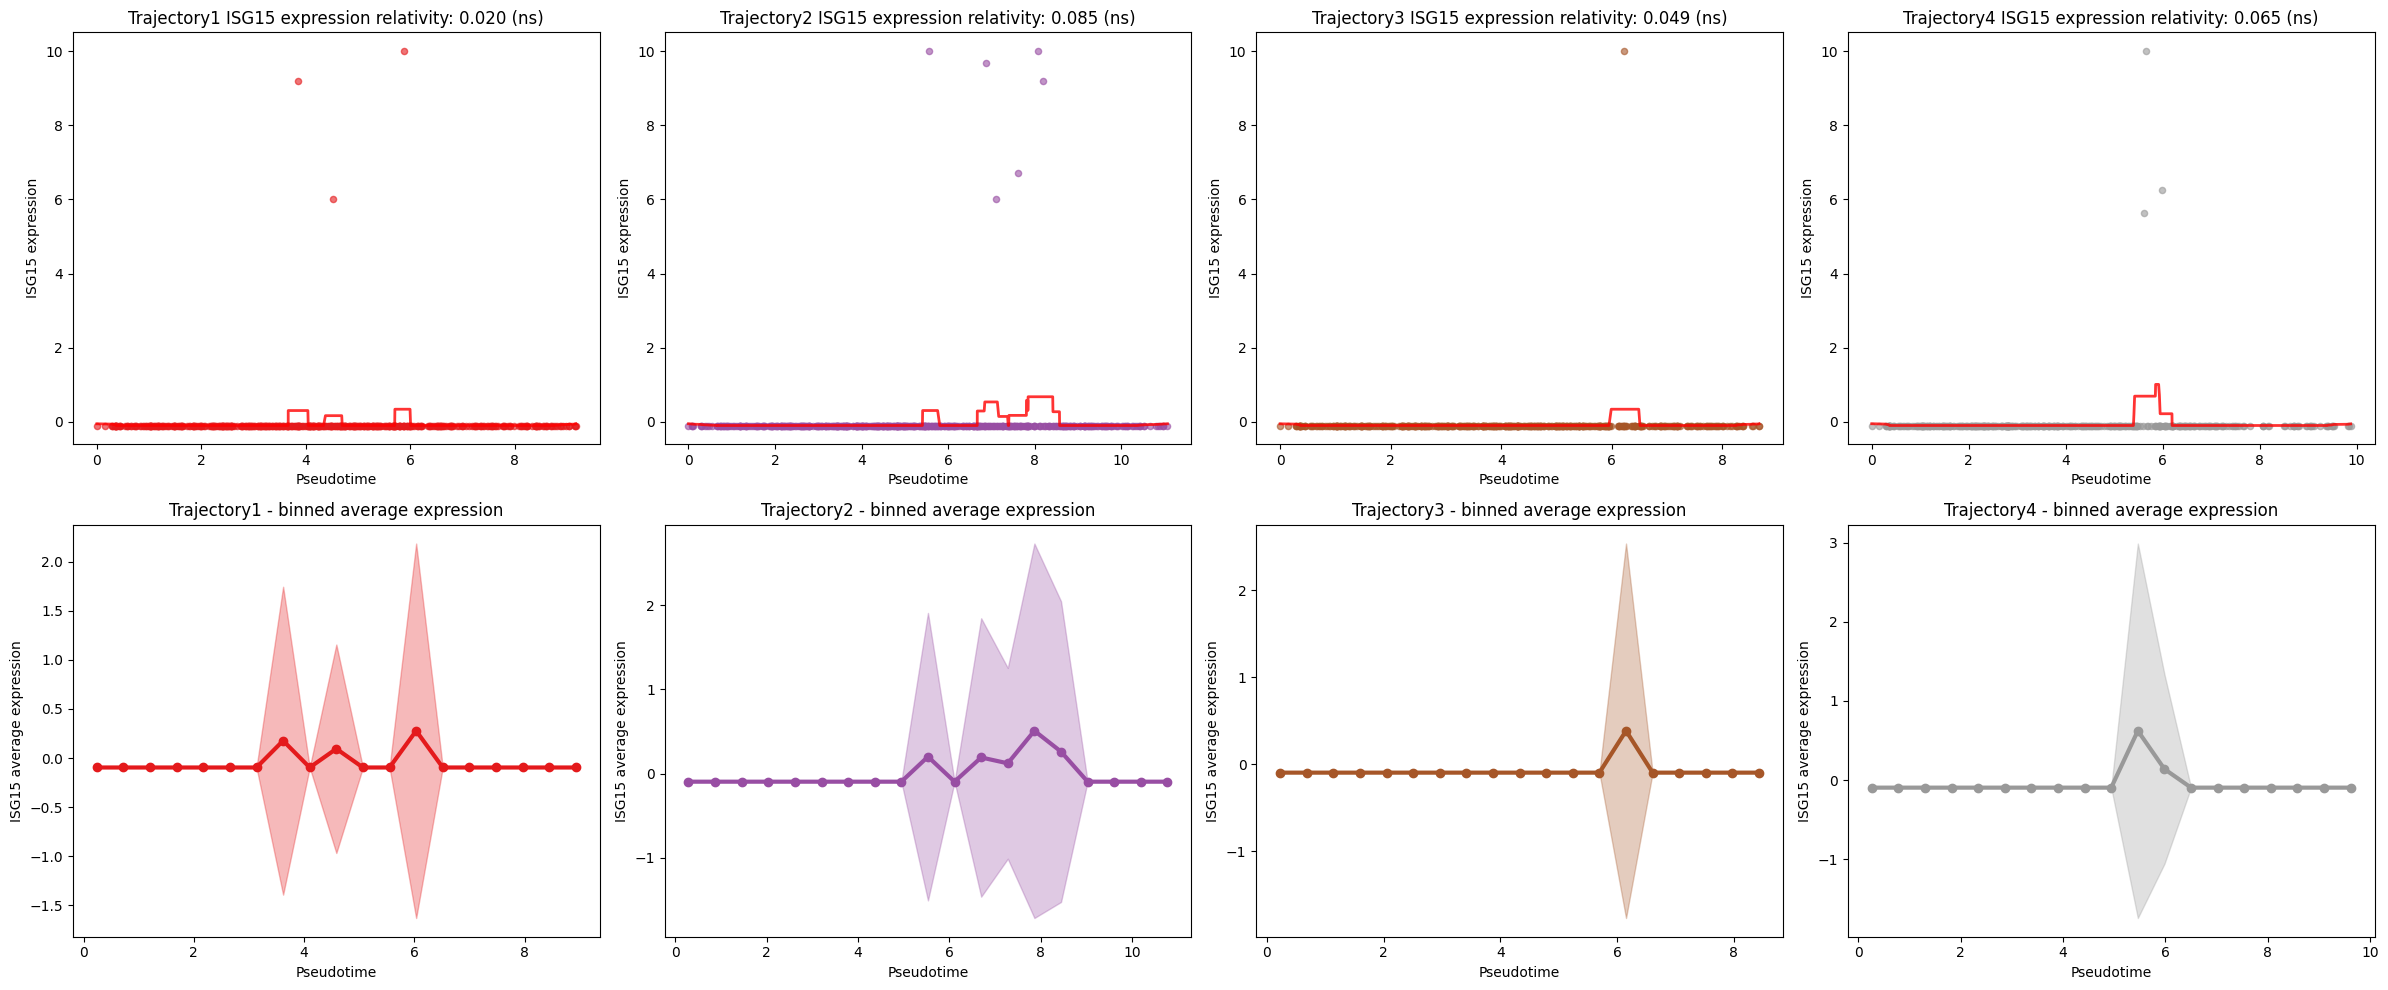

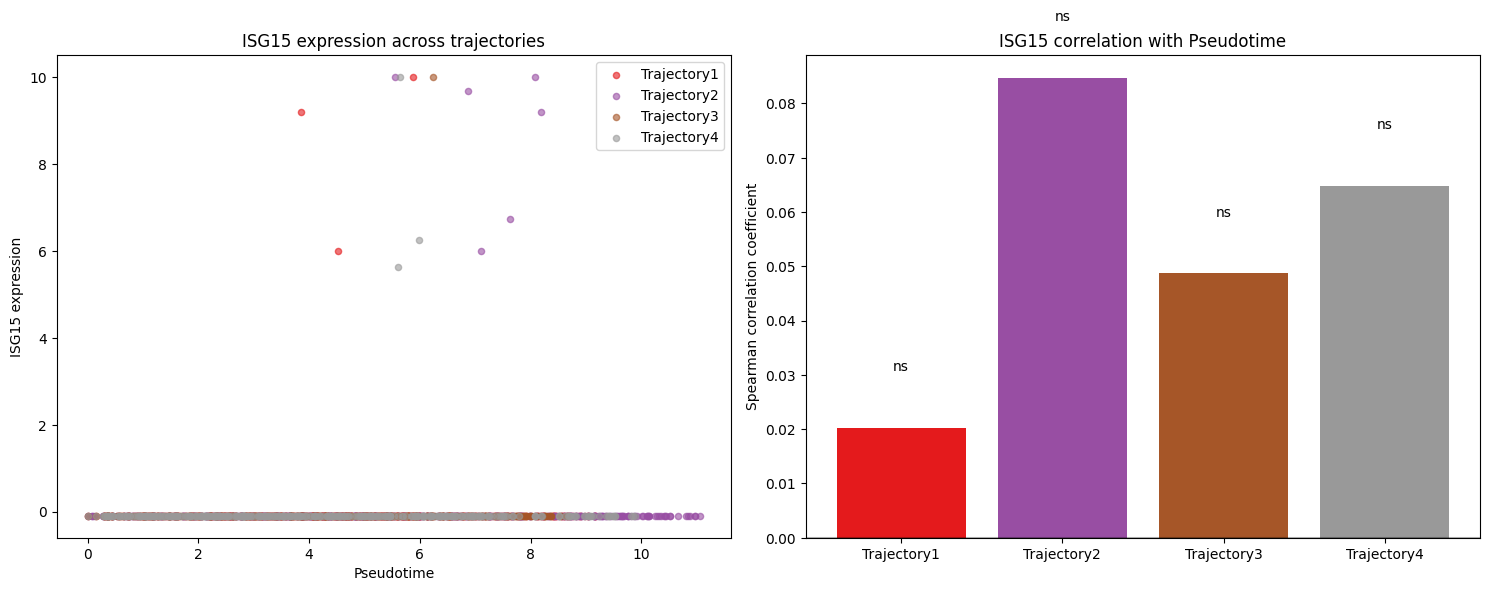

Analyzing: WNT4
--------------------------------------------------
Trajectory1: Correlation=nan, p=nan, Cell Counts=475
Trajectory2: Correlation=nan, p=nan, Cell Counts=518
Trajectory3: Correlation=nan, p=nan, Cell Counts=460
Trajectory4: Correlation=nan, p=nan, Cell Counts=405


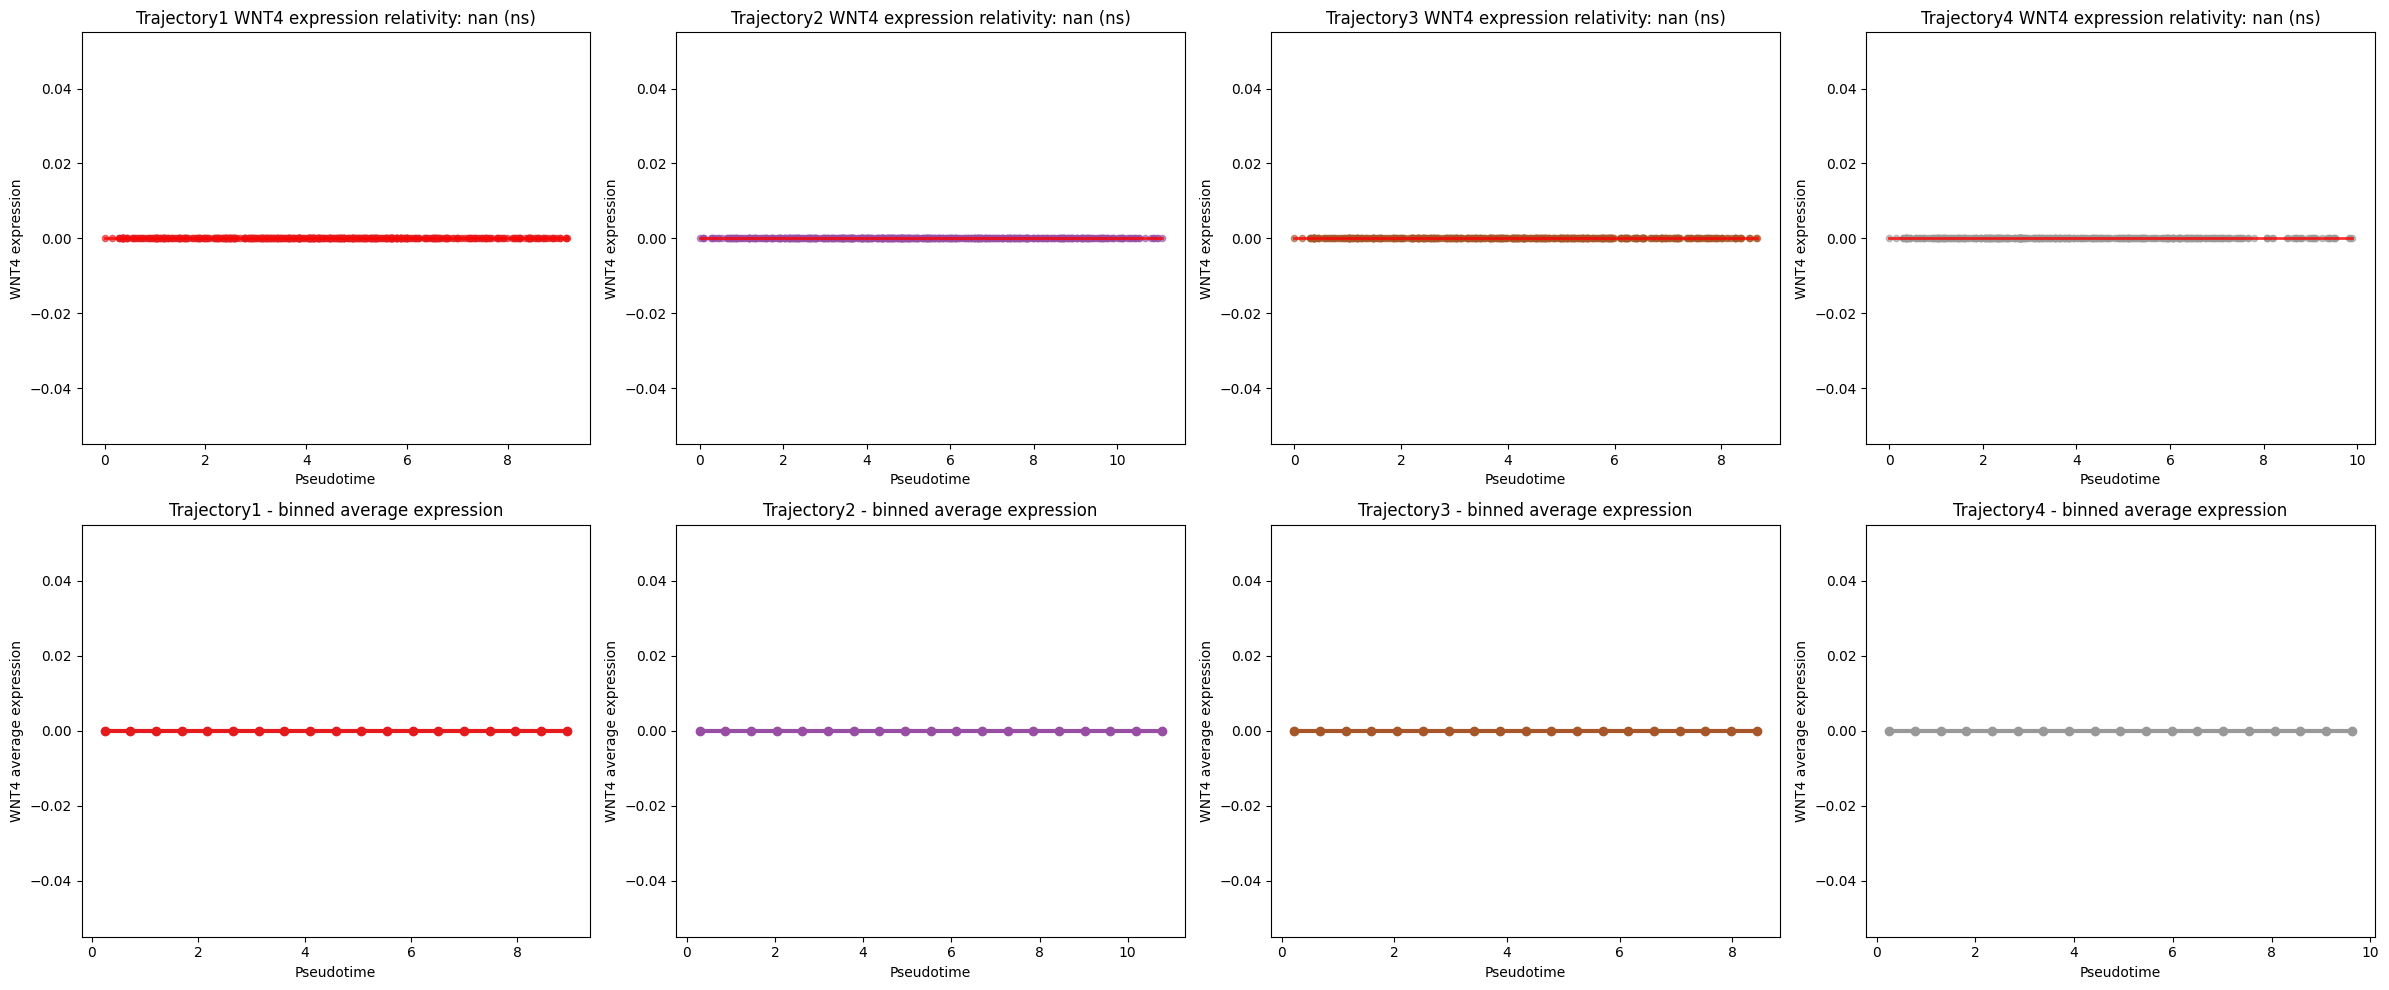

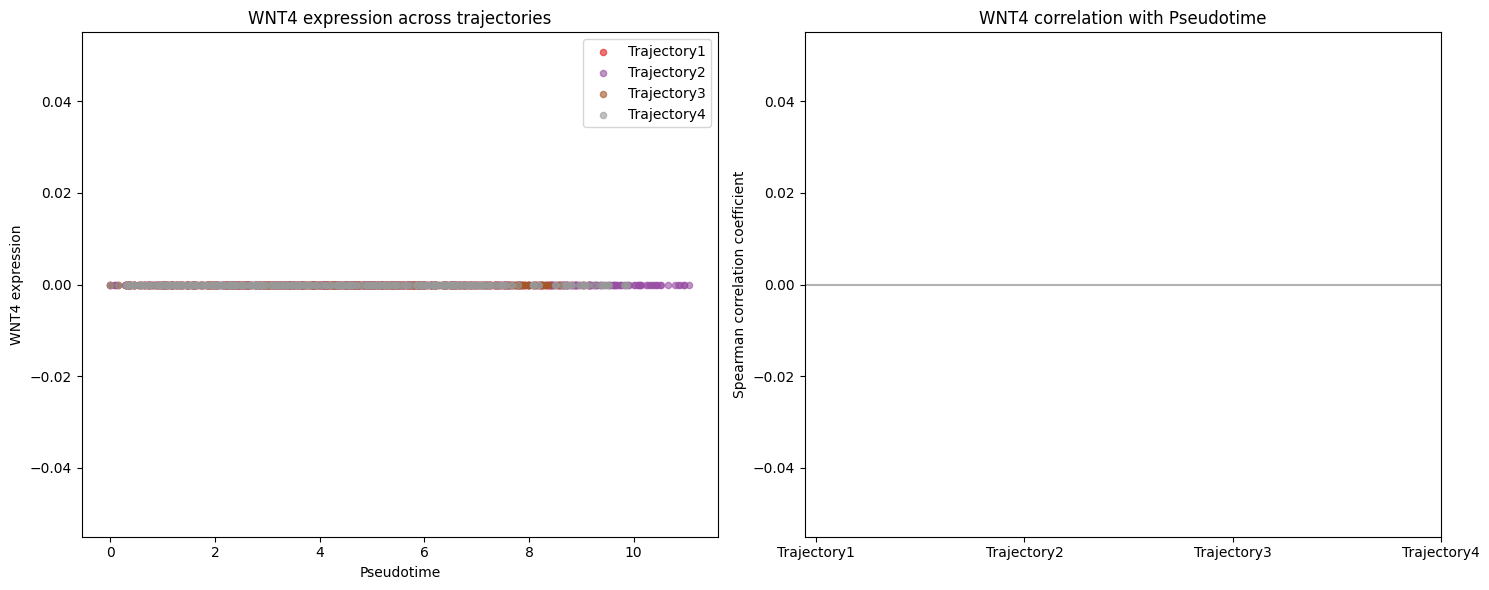

Analyzing: C1QA
--------------------------------------------------
Trajectory1: Correlation=-0.014, p=7.536e-01, Cell Counts=475
Trajectory2: Correlation=-0.023, p=6.071e-01, Cell Counts=518
Trajectory3: Correlation=0.068, p=1.456e-01, Cell Counts=460
Trajectory4: Correlation=0.060, p=2.319e-01, Cell Counts=405


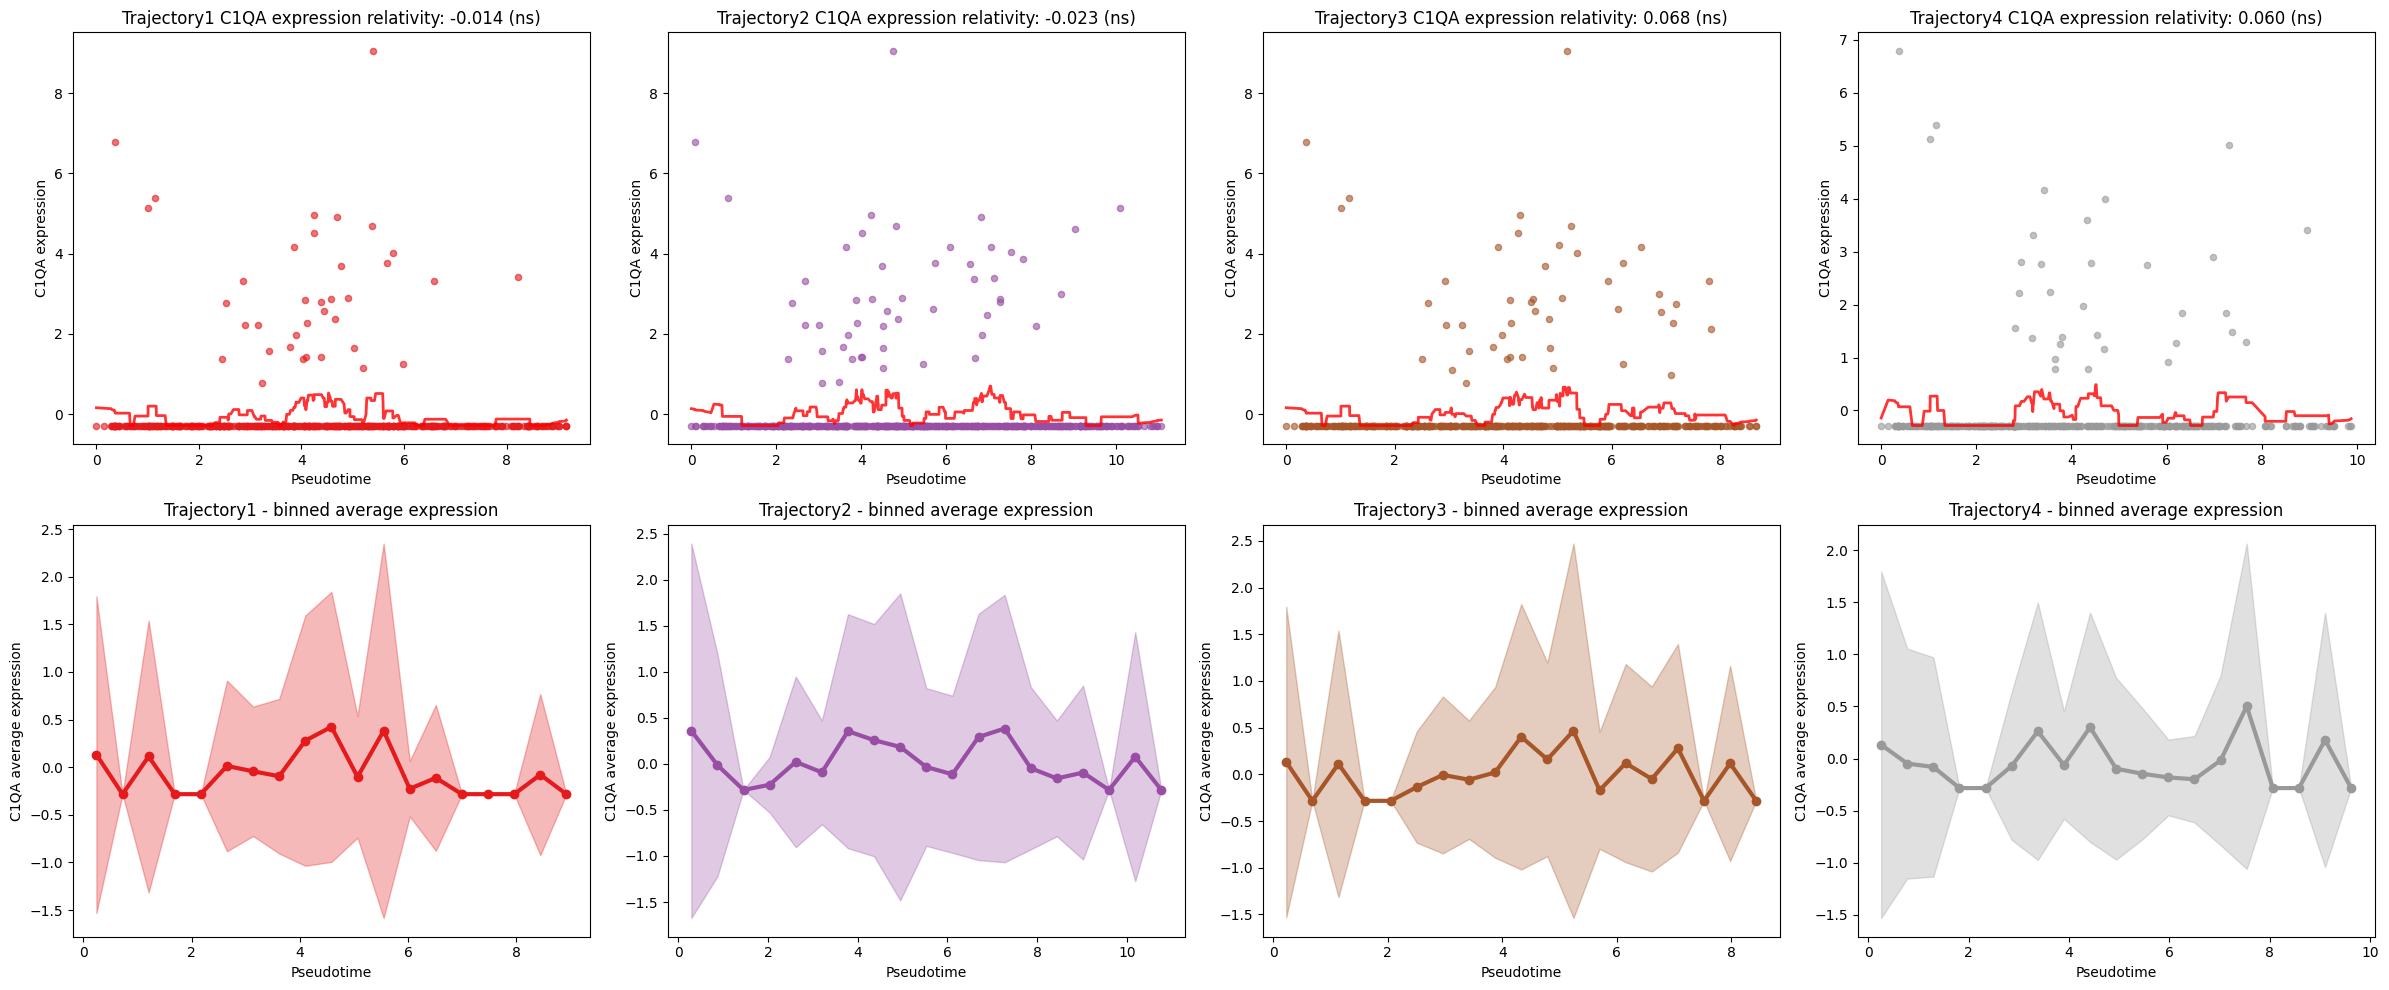

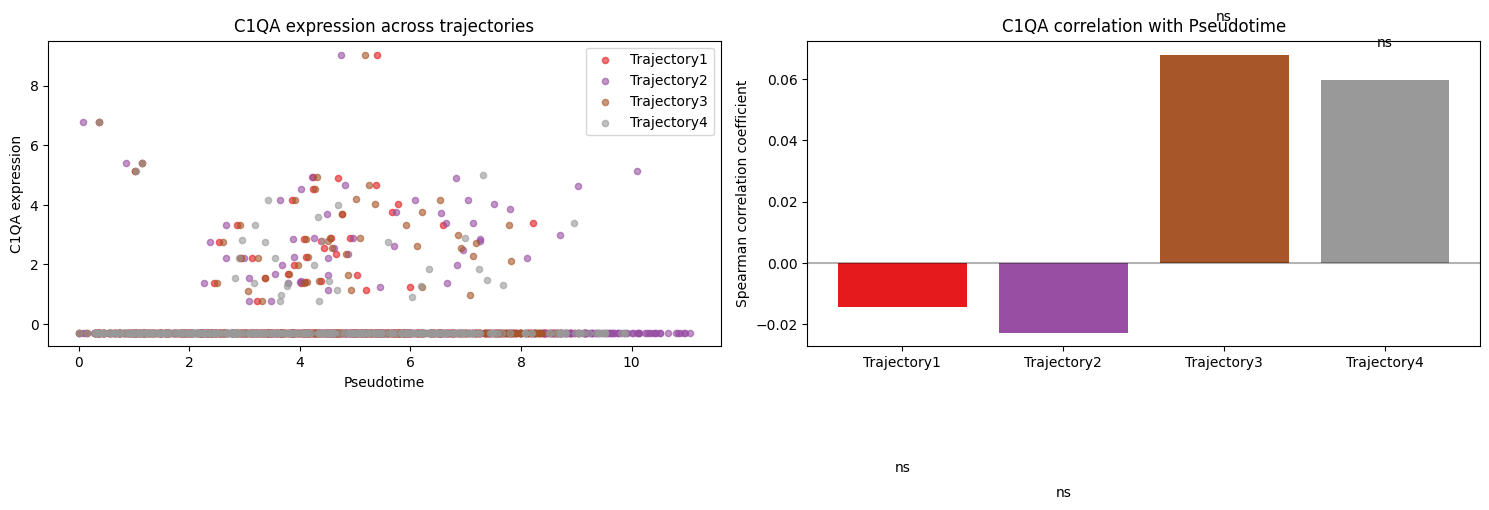

Analyzing: PDPN
--------------------------------------------------
Trajectory1: Correlation=-0.070, p=1.259e-01, Cell Counts=475
Trajectory2: Correlation=0.001, p=9.884e-01, Cell Counts=518
Trajectory3: Correlation=-0.074, p=1.132e-01, Cell Counts=460
Trajectory4: Correlation=-0.060, p=2.294e-01, Cell Counts=405


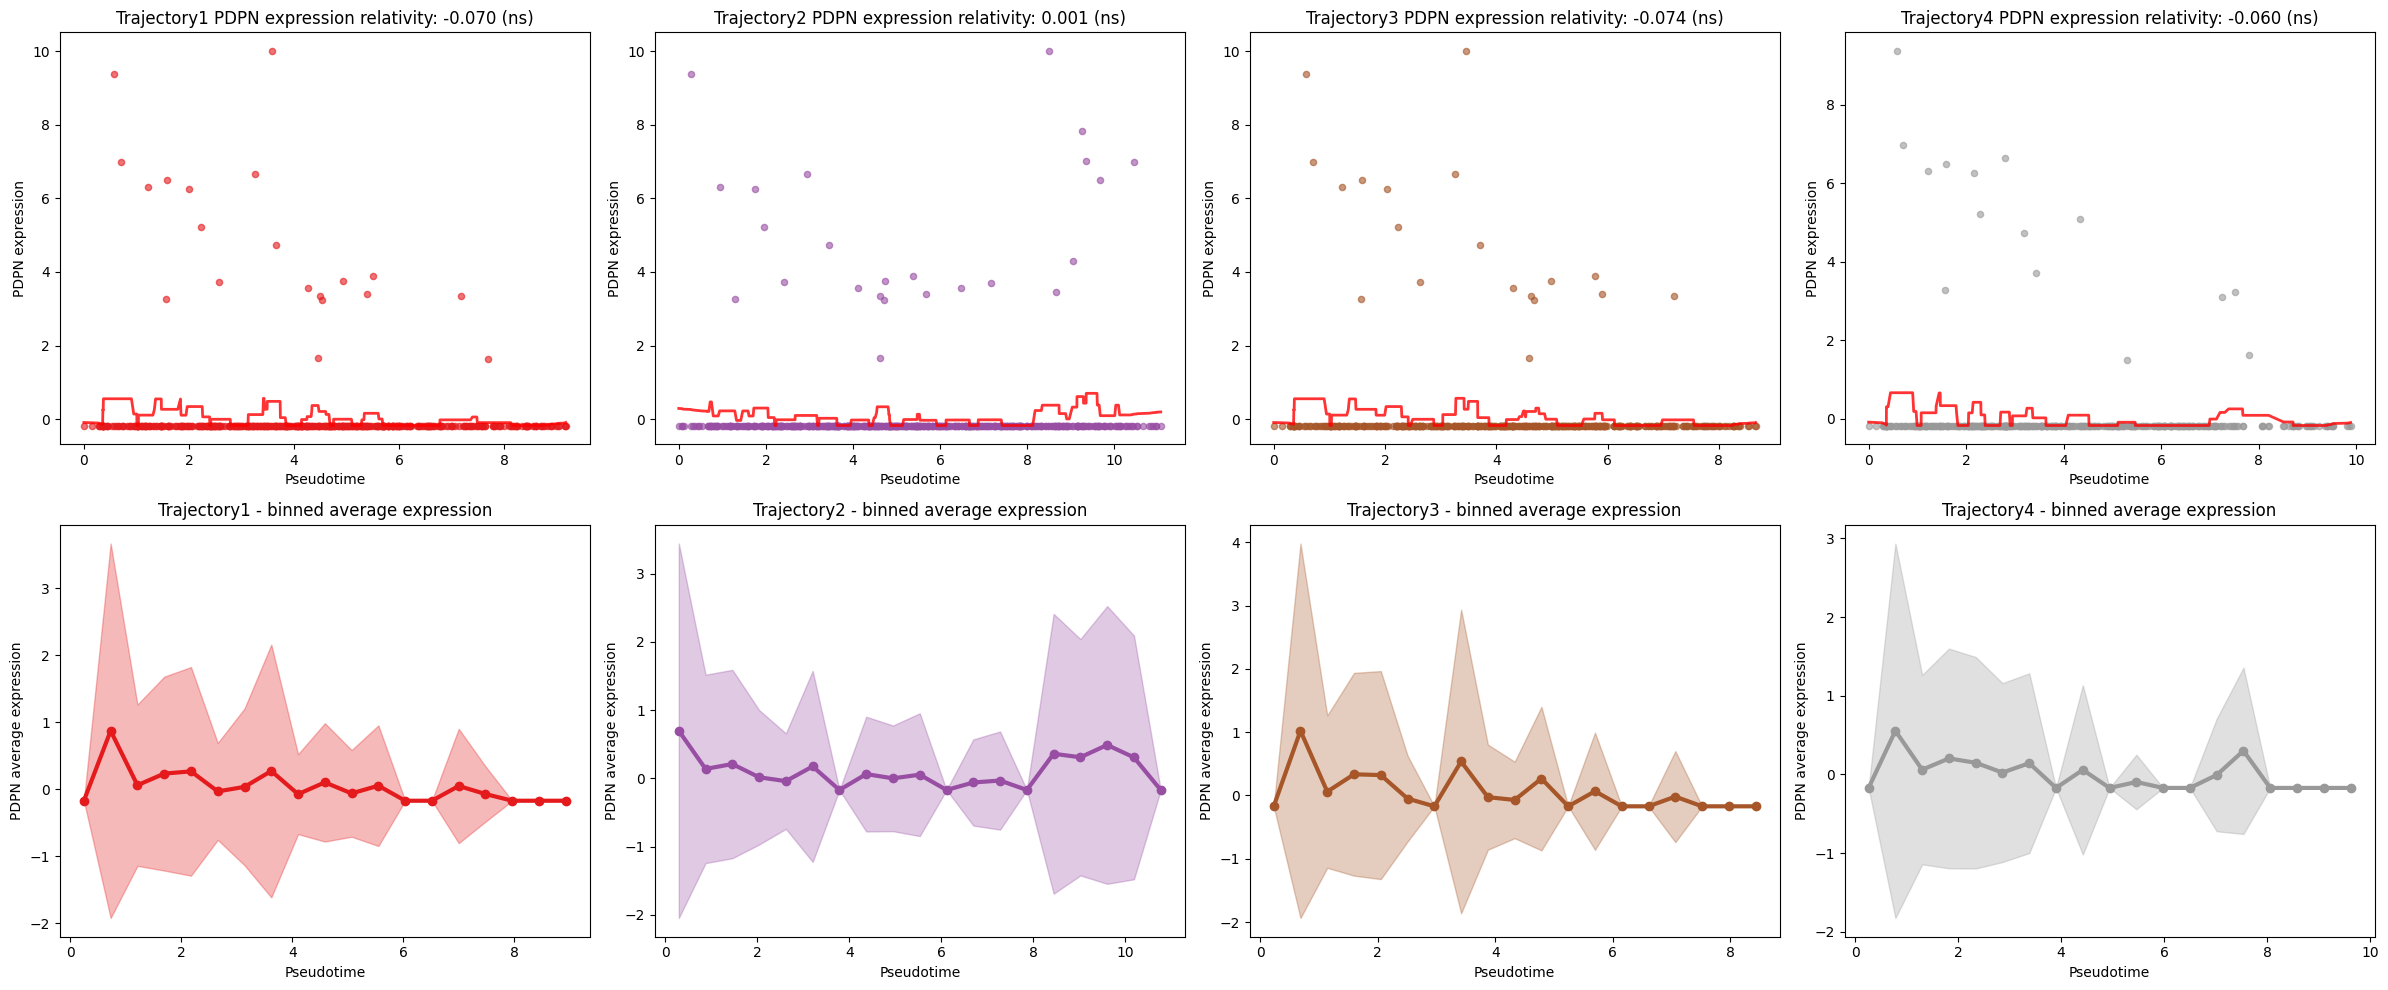

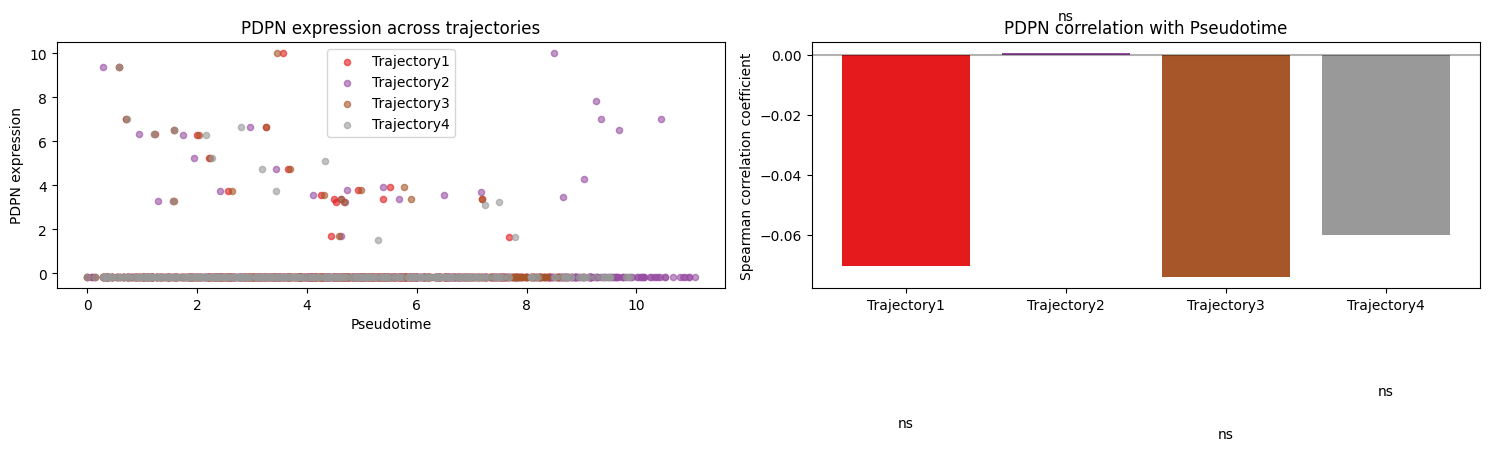

Analyzing: TP73
--------------------------------------------------
Trajectory1: Correlation=0.023, p=6.243e-01, Cell Counts=475
Trajectory2: Correlation=-0.058, p=1.891e-01, Cell Counts=518
Trajectory3: Correlation=0.076, p=1.037e-01, Cell Counts=460
Trajectory4: Correlation=0.050, p=3.202e-01, Cell Counts=405


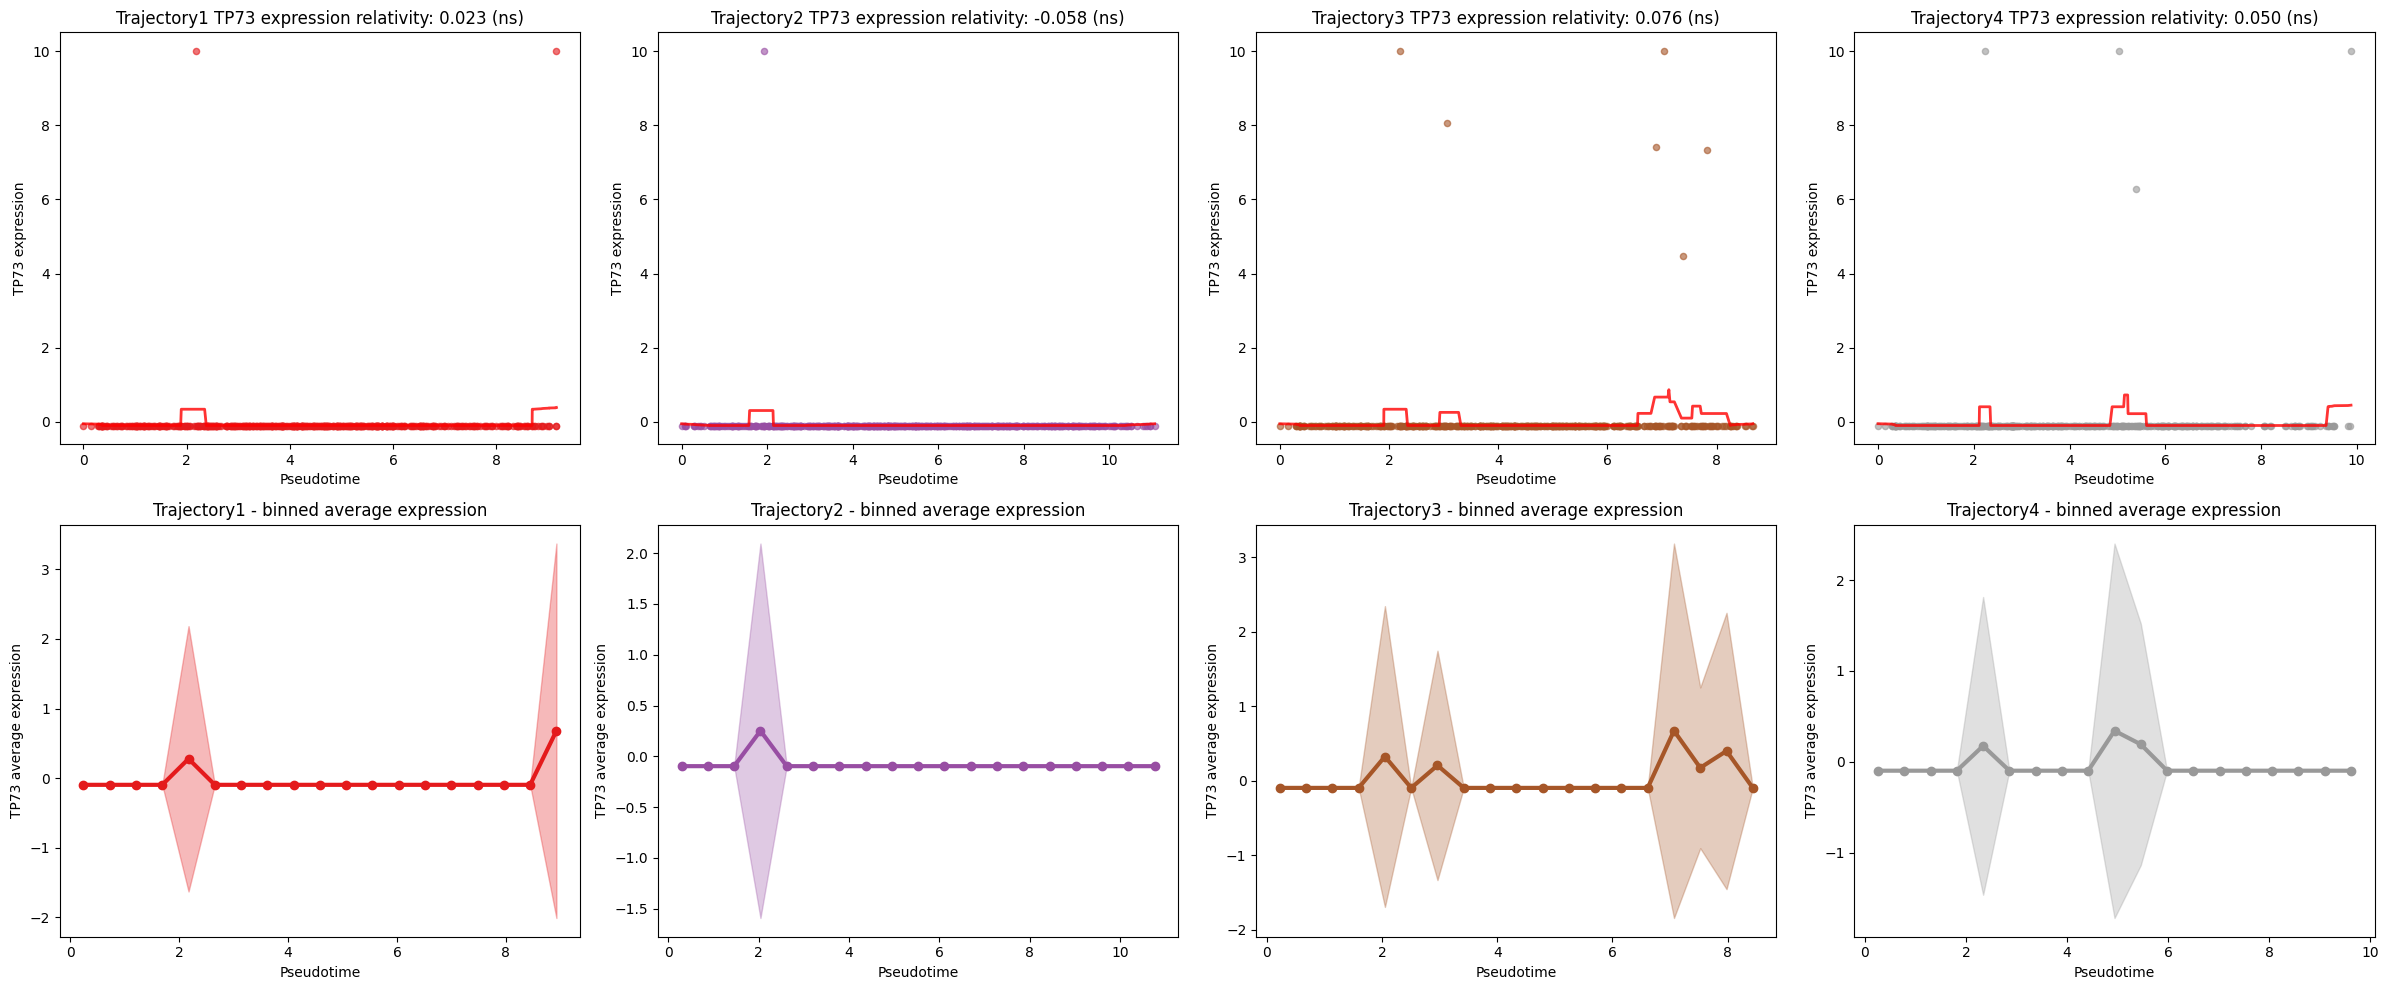

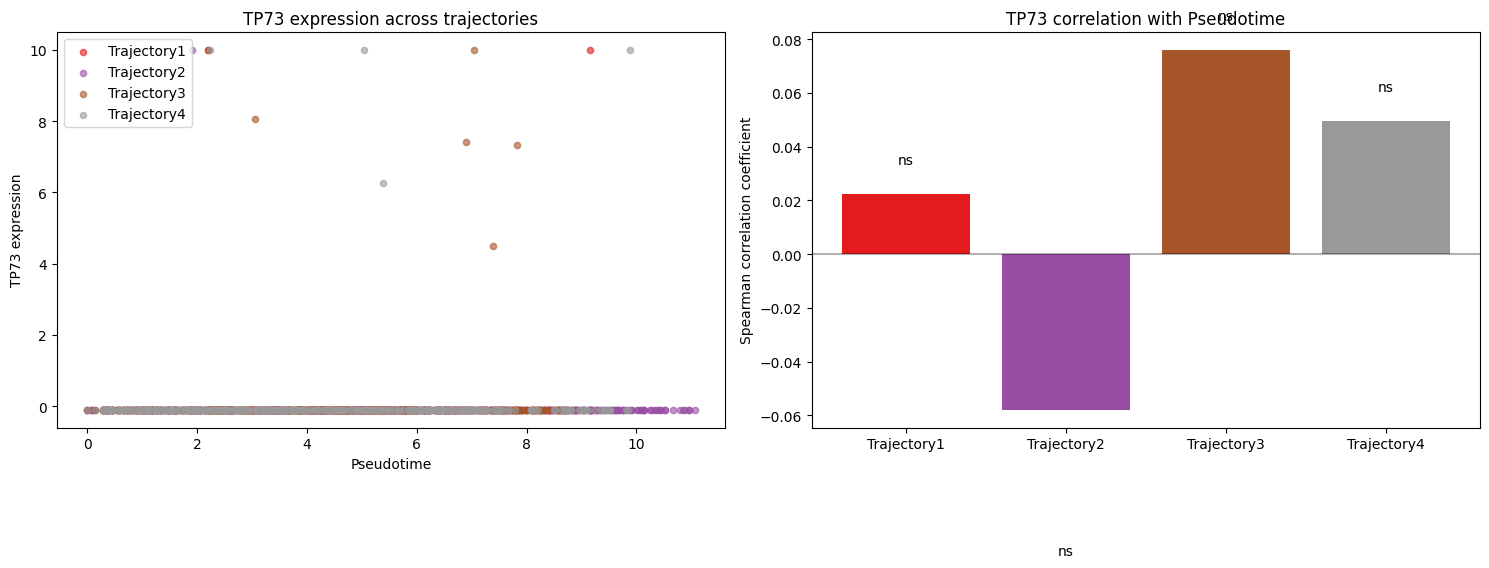

In [18]:
demo_genes = ["ISG15", "WNT4", "C1QA", "PDPN", "TP73"]

# Analyze gene expression along trajectories
gene_trajectory_results = analyze_gene_expression_along_trajectories(
    adata=adata, 
    gene_names=demo_genes,
    use_merged=True
)